In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#%cd /content/drive/MyDrive/

# Home Credit Revolving loans/Cash loans 24か月

In [3]:
import torch
# GPUの名称、CUDA Compute Capabilityを取得
print(torch.cuda.get_device_name())

NVIDIA RTX A2000 Laptop GPU


In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16346750288984504526
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1745276110
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11654112003249768110
 physical_device_desc: "device: 0, name: NVIDIA RTX A2000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [33]:
import cupy as cp
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn import linear_model
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
from sklearn.datasets import make_moons


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from keras.layers import Dense, Dropout
from keras.models import Sequential

from six import StringIO

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import math
from scipy import stats
import numpy as np
import pandas as pd
import tensorflow as tf

from datetime import datetime
from tensorflow import feature_column
from tensorflow.keras import layers

from tqdm import tqdm

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print("OK\n")

OK



In [16]:
app_train_origin = pd.read_csv('./home-credit-default-risk/exports/app_train.csv')
app_test_origin =  pd.read_csv('./home-credit-default-risk/exports/app_test.csv')
app_hc_train_origin = pd.read_csv('./home-credit-default-risk/datasets/app_train_hc_rev_cash_axis-00-monthes.csv')
app_hc_test_origin =  pd.read_csv('./home-credit-default-risk/datasets/app_test_hc_rev_cash_axis-00-monthes.csv')
app_train_origin.head()

,LANDAREA_MEDI,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_EMPLOYED,CNT_CHILDREN,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MODE,TARGET,NAME_EDUCATION_TYPE,FLAG_MOBIL,...,DAYS_ID_PUBLISH,DAYS_BIRTH,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_ANNUITY,FLOORSMIN_MODE,LIVINGAPARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MEDI,BASEMENTAREA_MEDI,AMT_CREDIT
0,1.203650,0,0.379837,-637.0,0,0.975354,1.506565,1,0,1,...,0.579154,-1.506880,0,0,-0.088844,0.1250,1.188621,0.973233,-0.726610,-0.478095
1,1.199766,1,1.078697,-1188.0,0,0.985873,1.506565,0,1,1,...,1.790855,0.166821,0,1,0.670508,0.3333,1.556671,0.978441,-0.377455,1.725450
2,-0.827100,0,0.206116,-225.0,0,-0.995749,-0.663503,0,0,1,...,0.306869,0.689509,1,0,-1.666947,NaN,-0.668443,-1.024592,NaN,-1.152888
3,-0.827100,0,-1.375829,-3039.0,0,-0.995749,-0.663503,0,0,1,...,0.369143,0.680114,0,1,0.266951,NaN,-0.668443,-1.024592,NaN,-0.711430
4,-0.827100,0,0.191639,-3038.0,0,-0.995749,-0.663503,0,0,1,...,-0.307263,0.892535,0,0,-0.301776,NaN,-0.668443,-1.024592,NaN,-0.213734


## applicationの欠損値を補完(Batchもしくは他のNoteへ移管)

In [7]:
# applicationの欠損値を補完
#imputer = IterativeImputer()
#replace_columns = list(app_test_origin.select_dtypes(include='number').columns)
#app_train_origin_replace = pd.DataFrame(imputer.fit_transform(app_train_origin[replace_columns].copy()), columns=replace_columns)
#app_test_origin_replace = pd.DataFrame(imputer.fit_transform(app_test_origin[replace_columns].copy()), columns=replace_columns)
#app_test_origin_replace.head()

In [8]:
# 欠損値を補完した列を再結合
#app_train_origin[replace_columns] = app_train_origin_replace[replace_columns]
#app_test_origin[replace_columns] = app_test_origin_replace[replace_columns]
#app_test_origin.head()

In [9]:
# idをint型へ戻す
#app_train_origin['SK_ID_CURR'] = app_train_origin[["SK_ID_CURR"]].astype(int) 
#app_test_origin['SK_ID_CURR'] = app_test_origin[["SK_ID_CURR"]].astype(int)
#app_test_origin.head()

## OriginデータのCOPY

In [17]:
app_train = app_train_origin.copy()
app_test = app_test_origin.copy()
app_hc_train = app_hc_train_origin.copy()
app_hc_test = app_hc_test_origin.copy()
app_test.head()

,LANDAREA_MEDI,NAME_TYPE_SUITE,DAYS_REGISTRATION,DAYS_EMPLOYED,CNT_CHILDREN,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MODE,NAME_EDUCATION_TYPE,FLAG_MOBIL,REGION_RATING_CLIENT_W_CITY,...,DAYS_ID_PUBLISH,DAYS_BIRTH,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_ANNUITY,FLOORSMIN_MODE,LIVINGAPARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MEDI,BASEMENTAREA_MEDI,AMT_CREDIT
0,-0.827100,0,-0.052196,-2329.0,0,0.984586,-0.663503,1,1,2,...,1.445696,-8.083901,0,1,-0.402850,NaN,-0.668443,0.973636,-0.254507,-0.075097
1,-0.827100,0,-1.172870,-4469.0,0,-0.995749,-0.663503,0,1,2,...,0.908413,-7.814193,0,0,-0.659439,NaN,-0.668443,-1.024592,NaN,-0.934825
2,-0.827100,5,0.797961,-4458.0,0,-0.995749,-0.663503,1,1,2,...,-0.337075,-8.266532,0,0,2.636583,NaN,-0.668443,-1.024592,NaN,0.159601
3,1.233005,0,0.847636,-1866.0,2,1.093100,1.509187,0,1,2,...,-0.804133,-6.877434,0,1,1.491917,0.0417,1.616981,0.983273,1.512449,2.424840
4,-0.827100,0,0.279919,-2191.0,1,-0.995749,-0.663503,0,1,2,...,-0.839908,-6.662951,0,0,0.429720,NaN,-0.668443,-1.024592,NaN,0.065776


In [18]:
app_train = app_train_origin[['SK_ID_CURR', 'TARGET']].copy()
app_test = app_test_origin[['SK_ID_CURR']].copy()
app_hc_train = app_hc_train_origin.copy()
app_hc_test = app_hc_test_origin.copy()
app_test.head()

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038


In [19]:
app_hc_train = app_hc_train.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
app_hc_test = app_hc_test.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
len(app_hc_train)

8604

In [20]:
# trainへマージ
app_train = pd.merge(app_train, app_hc_train, on='SK_ID_CURR', how='left')
# testへマージ
app_test = pd.merge(app_test, app_hc_test, on='SK_ID_CURR', how='left')
len(app_test)

48744

In [21]:
app_train.head()

,SK_ID_CURR,TARGET,aac,pac,unique_key_1,unique_key_2,key_gender,user_age,unique_key_1.1,unique_key_2.1,...,hc_re_cash_variance_samp_sk_dpd,hc_re_cash_max_cash_iedays,hc_re_cash_min_cash_iedays,hc_re_cash_sum_cash_iedays,hc_re_cash_avg_cash_iedays,hc_re_cash_count_cash_iedays,hc_re_cash_stddev_cash_iedays,hc_re_cash_var_pop_cash_iedays,hc_re_cash_var_samp_cash_iedays,hc_re_cash_variance_cash_iedays
0,100002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
app_test.head()

,SK_ID_CURR,aac,pac,unique_key_1,unique_key_2,key_gender,user_age,unique_key_1.1,unique_key_2.1,region_population_relative,...,hc_re_cash_variance_samp_sk_dpd,hc_re_cash_max_cash_iedays,hc_re_cash_min_cash_iedays,hc_re_cash_sum_cash_iedays,hc_re_cash_avg_cash_iedays,hc_re_cash_count_cash_iedays,hc_re_cash_stddev_cash_iedays,hc_re_cash_var_pop_cash_iedays,hc_re_cash_var_samp_cash_iedays,hc_re_cash_variance_cash_iedays
0,100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
app_train_origin = app_train.copy()
app_test_origin = app_test.copy()
app_train_origin.head()

,SK_ID_CURR,TARGET,aac,pac,unique_key_1,unique_key_2,key_gender,user_age,unique_key_1.1,unique_key_2.1,...,hc_re_cash_variance_samp_sk_dpd,hc_re_cash_max_cash_iedays,hc_re_cash_min_cash_iedays,hc_re_cash_sum_cash_iedays,hc_re_cash_avg_cash_iedays,hc_re_cash_count_cash_iedays,hc_re_cash_stddev_cash_iedays,hc_re_cash_var_pop_cash_iedays,hc_re_cash_var_samp_cash_iedays,hc_re_cash_variance_cash_iedays
0,100002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 共通関数の定義

In [24]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

## 前処理

### name_contract_type

In [17]:
#columns = ['name_contract_type']
#app_train.drop(columns, axis=1, inplace=True)
#app_test.drop(columns, axis=1, inplace=True)

### sk_id_curr

### aac

### pac

### unique_key_1

### unique_key_2

### key_gender

### user_age

### unique_key_1

### unique_key_2

### region_population_relative

### ext_source_1

### ext_source_2

### ext_source_3

### hc_re_cash_max_amt_annuity

In [89]:
### Originから切り戻し
app_train['hc_re_cash_max_amt_annuity'] = app_train_origin['hc_re_cash_max_amt_annuity'].copy()
app_test['hc_re_cash_max_amt_annuity'] = app_test_origin['hc_re_cash_max_amt_annuity'].copy()
app_train['hc_re_cash_max_amt_annuity'].isnull().sum()

298907

In [90]:
app_train['hc_re_cash_max_amt_annuity'].value_counts()

52999.920    23
34767.495    18
27449.820    18
31544.370    15
14746.455    14
             ..
17611.110     1
93647.115     1
53211.015     1
21844.350     1
45353.205     1
Name: hc_re_cash_max_amt_annuity, Length: 5486, dtype: int64

The correlation between hc_re_cash_max_amt_annuity and the TARGET is -0.0379
Median value for loan that was not repaid = 21067.2225
Median value for loan that was repaid =     25026.4800


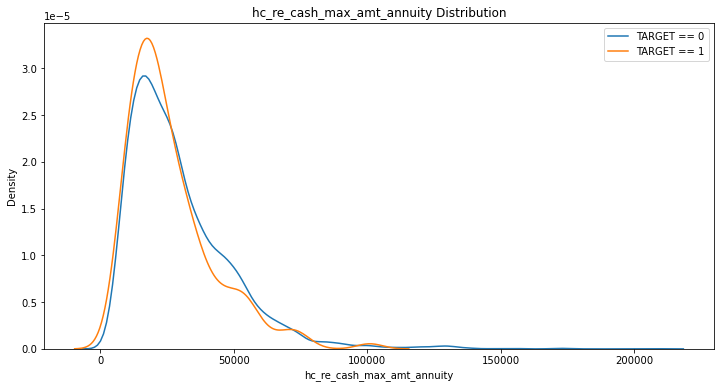

In [91]:
kde_target('hc_re_cash_max_amt_annuity', app_train)

In [92]:
app_train[['TARGET', 'hc_re_cash_max_amt_annuity']].corr()

,TARGET,hc_re_cash_max_amt_annuity
TARGET,1.000000,-0.037865
hc_re_cash_max_amt_annuity,-0.037865,1.000000


In [93]:
### -999埋めで欠損値補完
app_train['hc_re_cash_max_amt_annuity'] = app_train['hc_re_cash_max_amt_annuity'].fillna(-999)
app_test['hc_re_cash_max_amt_annuity'] = app_test['hc_re_cash_max_amt_annuity'].fillna(-999)
app_train['hc_re_cash_max_amt_annuity'].isnull().sum()

0

In [94]:
app_train[['TARGET', 'hc_re_cash_max_amt_annuity']].corr()

,TARGET,hc_re_cash_max_amt_annuity
TARGET,1.000000,-0.017579
hc_re_cash_max_amt_annuity,-0.017579,1.000000


In [95]:
## 標準化
num_cols = ['hc_re_cash_max_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_max_amt_annuity', 'TARGET']].corr()

,hc_re_cash_max_amt_annuity,TARGET
hc_re_cash_max_amt_annuity,1.000000,-0.017579
TARGET,-0.017579,1.000000


The correlation between hc_re_cash_max_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1428
Median value for loan that was repaid =     -0.1428


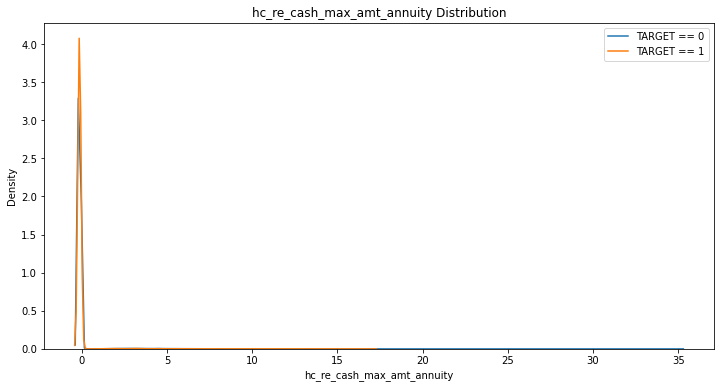

In [96]:
## Yao-Johnson変換後の特徴量の分布
kde_target('hc_re_cash_max_amt_annuity', app_train)

### hc_re_cash_min_amt_annuity

In [97]:
### Originから切り戻し
app_train['hc_re_cash_min_amt_annuity'] = app_train_origin['hc_re_cash_min_amt_annuity'].copy()
app_test['hc_re_cash_min_amt_annuity'] = app_test_origin['hc_re_cash_min_amt_annuity'].copy()
app_train['hc_re_cash_min_amt_annuity'].isnull().sum()

298907

In [98]:
app_train['hc_re_cash_min_amt_annuity'].value_counts()

4915.485     21
7869.015     21
24172.650    19
27449.820    19
9830.970     18
             ..
6832.080      1
31495.320     1
21546.900     1
13664.250     1
30375.270     1
Name: hc_re_cash_min_amt_annuity, Length: 5244, dtype: int64

In [99]:
app_train[['TARGET', 'hc_re_cash_min_amt_annuity']].corr()

,TARGET,hc_re_cash_min_amt_annuity
TARGET,1.000000,-0.034982
hc_re_cash_min_amt_annuity,-0.034982,1.000000


In [100]:
### -999埋めで欠損値補完
app_train['hc_re_cash_min_amt_annuity'] = app_train['hc_re_cash_min_amt_annuity'].fillna(-999)
app_test['hc_re_cash_min_amt_annuity'] = app_test['hc_re_cash_min_amt_annuity'].fillna(-999)
app_train['hc_re_cash_min_amt_annuity'].isnull().sum()

0

In [101]:
app_train[['TARGET', 'hc_re_cash_min_amt_annuity']].corr()

,TARGET,hc_re_cash_min_amt_annuity
TARGET,1.000000,-0.017134
hc_re_cash_min_amt_annuity,-0.017134,1.000000


In [103]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_min_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_min_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_min_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_min_amt_annuity']].corr()

,TARGET,hc_re_cash_min_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_min_amt_annuity,-0.01756,1.00000


In [104]:
## 標準化
num_cols = ['hc_re_cash_min_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_min_amt_annuity', 'TARGET']].corr()

,hc_re_cash_min_amt_annuity,TARGET
hc_re_cash_min_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_min_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


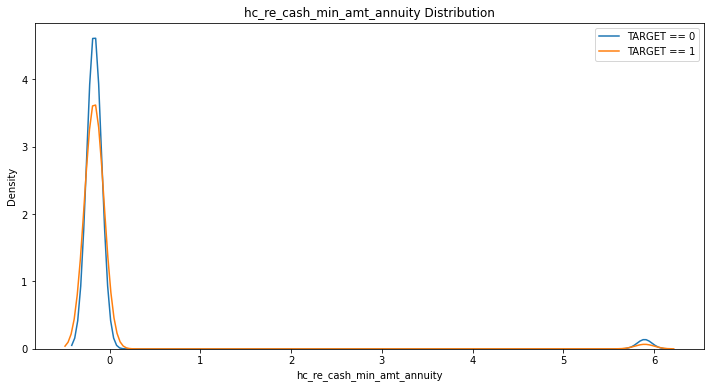

In [105]:
kde_target('hc_re_cash_min_amt_annuity', app_train)

### hc_re_cash_sum_amt_annuity

In [107]:
### Originから切り戻し
app_train['hc_re_cash_sum_amt_annuity'] = app_train_origin['hc_re_cash_sum_amt_annuity'].copy()
app_test['hc_re_cash_sum_amt_annuity'] = app_test_origin['hc_re_cash_sum_amt_annuity'].copy()
app_train['hc_re_cash_sum_amt_annuity'].isnull().sum()

298907

In [108]:
app_train['hc_re_cash_sum_amt_annuity'].value_counts()

2300446.98     5
669008.97      5
3059014.14     4
426030.57      4
258624.00      3
              ..
1979797.50     1
2718517.95     1
4843454.40     1
40865161.68    1
33002566.29    1
Name: hc_re_cash_sum_amt_annuity, Length: 8466, dtype: int64

In [109]:
app_train[['TARGET', 'hc_re_cash_sum_amt_annuity']].corr()

,TARGET,hc_re_cash_sum_amt_annuity
TARGET,1.000000,-0.027188
hc_re_cash_sum_amt_annuity,-0.027188,1.000000


In [110]:
### -999埋めで欠損値補完
app_train['hc_re_cash_sum_amt_annuity'] = app_train['hc_re_cash_sum_amt_annuity'].fillna(-999)
app_test['hc_re_cash_sum_amt_annuity'] = app_test['hc_re_cash_sum_amt_annuity'].fillna(-999)
app_train['hc_re_cash_sum_amt_annuity'].isnull().sum()

0

In [111]:
app_train[['TARGET', 'hc_re_cash_sum_amt_annuity']].corr()

,TARGET,hc_re_cash_sum_amt_annuity
TARGET,1.000000,-0.013145
hc_re_cash_sum_amt_annuity,-0.013145,1.000000


In [112]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_sum_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_sum_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_sum_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_sum_amt_annuity']].corr()

,TARGET,hc_re_cash_sum_amt_annuity
TARGET,1.000000,-0.017563
hc_re_cash_sum_amt_annuity,-0.017563,1.000000


In [113]:
## 標準化
num_cols = ['hc_re_cash_sum_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_sum_amt_annuity', 'TARGET']].corr()

,hc_re_cash_sum_amt_annuity,TARGET
hc_re_cash_sum_amt_annuity,1.000000,-0.017563
TARGET,-0.017563,1.000000


The correlation between hc_re_cash_sum_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


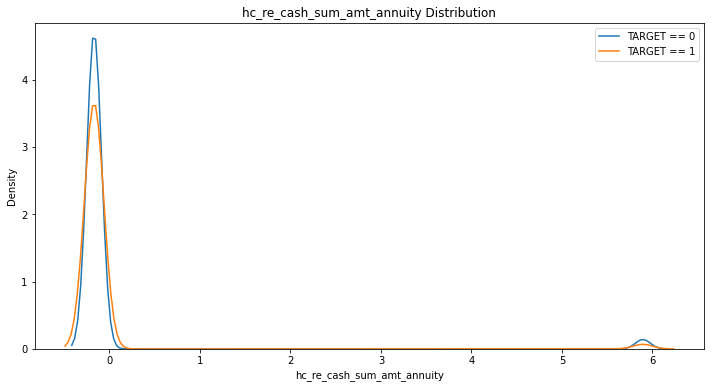

In [114]:
kde_target('hc_re_cash_sum_amt_annuity', app_train)

### hc_re_cash_avg_amt_annuity

In [115]:
### Originから切り戻し
app_train['hc_re_cash_avg_amt_annuity'] = app_train_origin['hc_re_cash_avg_amt_annuity'].copy()
app_test['hc_re_cash_avg_amt_annuity'] = app_test_origin['hc_re_cash_avg_amt_annuity'].copy()
app_train['hc_re_cash_avg_amt_annuity'].isnull().sum()

298907

In [116]:
app_train['hc_re_cash_avg_amt_annuity'].value_counts()

21709.125000    8
16164.000000    7
27389.250000    6
14139.360000    6
19737.000000    6
               ..
9309.047671     1
56880.000000    1
19282.815000    1
14322.201963    1
45085.473074    1
Name: hc_re_cash_avg_amt_annuity, Length: 8185, dtype: int64

In [117]:
app_train[['TARGET', 'hc_re_cash_avg_amt_annuity']].corr()

,TARGET,hc_re_cash_avg_amt_annuity
TARGET,1.000000,-0.035587
hc_re_cash_avg_amt_annuity,-0.035587,1.000000


In [118]:
### -999埋めで欠損値補完
app_train['hc_re_cash_avg_amt_annuity'] = app_train['hc_re_cash_avg_amt_annuity'].fillna(-999)
app_test['hc_re_cash_avg_amt_annuity'] = app_test['hc_re_cash_avg_amt_annuity'].fillna(-999)
app_train['hc_re_cash_avg_amt_annuity'].isnull().sum()

0

In [119]:
app_train[['TARGET', 'hc_re_cash_avg_amt_annuity']].corr()

,TARGET,hc_re_cash_avg_amt_annuity
TARGET,1.000000,-0.017456
hc_re_cash_avg_amt_annuity,-0.017456,1.000000


In [120]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_avg_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_avg_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_avg_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_avg_amt_annuity']].corr()

,TARGET,hc_re_cash_avg_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_avg_amt_annuity,-0.01756,1.00000


In [121]:
## 標準化
num_cols = ['hc_re_cash_avg_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_avg_amt_annuity', 'TARGET']].corr()

,hc_re_cash_avg_amt_annuity,TARGET
hc_re_cash_avg_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_avg_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


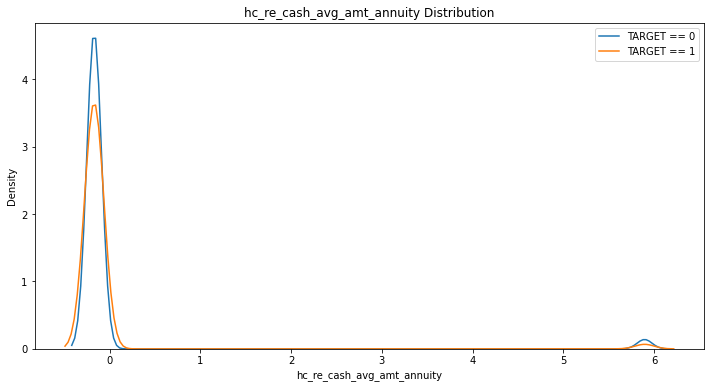

In [122]:
kde_target('hc_re_cash_avg_amt_annuity', app_train)

### hc_re_cash_cnt_amt_annuity

In [147]:
### Originから切り戻し
app_train['hc_re_cash_cnt_amt_annuity'] = app_train_origin['hc_re_cash_cnt_amt_annuity'].copy()
app_test['hc_re_cash_cnt_amt_annuity'] = app_test_origin['hc_re_cash_cnt_amt_annuity'].copy()
app_train['hc_re_cash_cnt_amt_annuity'].isnull().sum()

298907

In [148]:
app_train['hc_re_cash_cnt_amt_annuity'].value_counts()

156.0     246
42.0      223
56.0      167
36.0      143
64.0      143
         ... 
998.0       1
1521.0      1
2154.0      1
577.0       1
842.0       1
Name: hc_re_cash_cnt_amt_annuity, Length: 1392, dtype: int64

In [149]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_annuity']].corr()

,TARGET,hc_re_cash_cnt_amt_annuity
TARGET,1.000000,-0.022536
hc_re_cash_cnt_amt_annuity,-0.022536,1.000000


In [150]:
### -999埋めで欠損値補完
app_train['hc_re_cash_cnt_amt_annuity'] = app_train['hc_re_cash_cnt_amt_annuity'].fillna(-999)
app_test['hc_re_cash_cnt_amt_annuity'] = app_test['hc_re_cash_cnt_amt_annuity'].fillna(-999)
app_train['hc_re_cash_cnt_amt_annuity'].isnull().sum()

0

In [151]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_annuity']].corr()

,TARGET,hc_re_cash_cnt_amt_annuity
TARGET,1.000000,-0.017579
hc_re_cash_cnt_amt_annuity,-0.017579,1.000000


In [152]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_cnt_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_cnt_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_cnt_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_cnt_amt_annuity']].corr()

,TARGET,hc_re_cash_cnt_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_cnt_amt_annuity,-0.01756,1.00000


In [153]:
## 標準化
num_cols = ['hc_re_cash_cnt_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_cnt_amt_annuity', 'TARGET']].corr()

,hc_re_cash_cnt_amt_annuity,TARGET
hc_re_cash_cnt_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_cnt_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


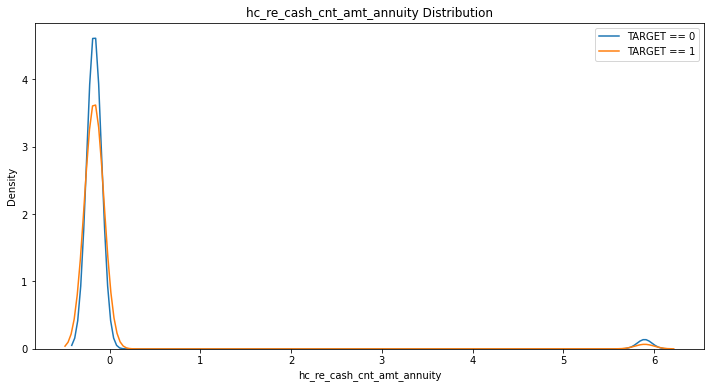

In [154]:
kde_target('hc_re_cash_cnt_amt_annuity', app_train)

### hc_re_cash_stddev_amt_annuity

In [172]:
### Originから切り戻し
app_train['hc_re_cash_stddev_amt_annuity'] = app_train_origin['hc_re_cash_stddev_amt_annuity'].copy()
app_test['hc_re_cash_stddev_amt_annuity'] = app_test_origin['hc_re_cash_stddev_amt_annuity'].copy()
app_train['hc_re_cash_stddev_amt_annuity'].isnull().sum()

298907

In [173]:
app_train['hc_re_cash_stddev_amt_annuity'].value_counts()

0.000000        4879
464.413271         1
9914.117905        1
8728.025438        1
4513.741983        1
                ... 
27187.428015       1
7166.878744        1
2429.204220        1
2715.385701        1
11245.520523       1
Name: hc_re_cash_stddev_amt_annuity, Length: 3726, dtype: int64

In [174]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_amt_annuity
TARGET,1.000000,-0.009129
hc_re_cash_stddev_amt_annuity,-0.009129,1.000000


In [175]:
### -999埋めで欠損値補完
app_train['hc_re_cash_stddev_amt_annuity'] = app_train['hc_re_cash_stddev_amt_annuity'].fillna(-999)
app_test['hc_re_cash_stddev_amt_annuity'] = app_test['hc_re_cash_stddev_amt_annuity'].fillna(-999)
app_train['hc_re_cash_stddev_amt_annuity'].isnull().sum()

0

In [176]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_amt_annuity
TARGET,1.00000,-0.01099
hc_re_cash_stddev_amt_annuity,-0.01099,1.00000


In [177]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_stddev_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_stddev_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_stddev_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_stddev_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_stddev_amt_annuity,-0.01756,1.00000


In [178]:
## 標準化
num_cols = ['hc_re_cash_stddev_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_stddev_amt_annuity', 'TARGET']].corr()

,hc_re_cash_stddev_amt_annuity,TARGET
hc_re_cash_stddev_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_stddev_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


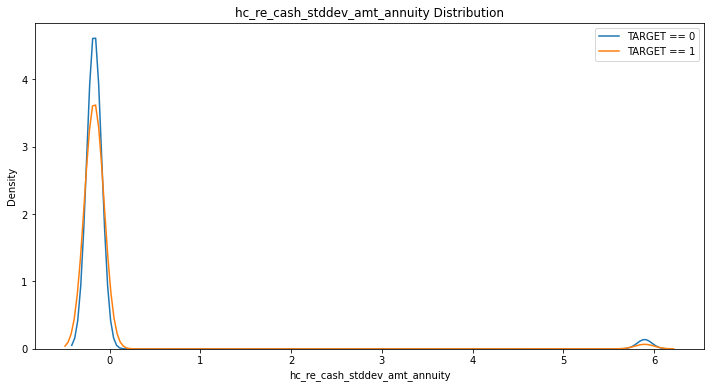

In [179]:
kde_target('hc_re_cash_stddev_amt_annuity', app_train)

### hc_re_cash_stddev_pop_amt_annuity

In [180]:
### Originから切り戻し
app_train['hc_re_cash_stddev_pop_amt_annuity'] = app_train_origin['hc_re_cash_stddev_pop_amt_annuity'].copy()
app_test['hc_re_cash_stddev_pop_amt_annuity'] = app_test_origin['hc_re_cash_stddev_pop_amt_annuity'].copy()
app_train['hc_re_cash_stddev_pop_amt_annuity'].isnull().sum()

298907

In [181]:
app_train['hc_re_cash_stddev_pop_amt_annuity'].value_counts()

0.000000        4879
464.413271         1
9914.117905        1
8728.025438        1
4513.741983        1
                ... 
27187.428015       1
7166.878744        1
2429.204220        1
2715.385701        1
11245.520523       1
Name: hc_re_cash_stddev_pop_amt_annuity, Length: 3726, dtype: int64

In [183]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_annuity
TARGET,1.000000,-0.009129
hc_re_cash_stddev_pop_amt_annuity,-0.009129,1.000000


In [184]:
### -999埋めで欠損値補完
app_train['hc_re_cash_stddev_pop_amt_annuity'] = app_train['hc_re_cash_stddev_pop_amt_annuity'].fillna(-999)
app_test['hc_re_cash_stddev_pop_amt_annuity'] = app_test['hc_re_cash_stddev_pop_amt_annuity'].fillna(-999)
app_train['hc_re_cash_stddev_pop_amt_annuity'].isnull().sum()

0

In [185]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_annuity
TARGET,1.00000,-0.01099
hc_re_cash_stddev_pop_amt_annuity,-0.01099,1.00000


In [186]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_stddev_pop_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_stddev_pop_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_stddev_pop_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_stddev_pop_amt_annuity,-0.01756,1.00000


In [187]:
## 標準化
num_cols = ['hc_re_cash_stddev_pop_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_stddev_pop_amt_annuity', 'TARGET']].corr()

,hc_re_cash_stddev_pop_amt_annuity,TARGET
hc_re_cash_stddev_pop_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_stddev_pop_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


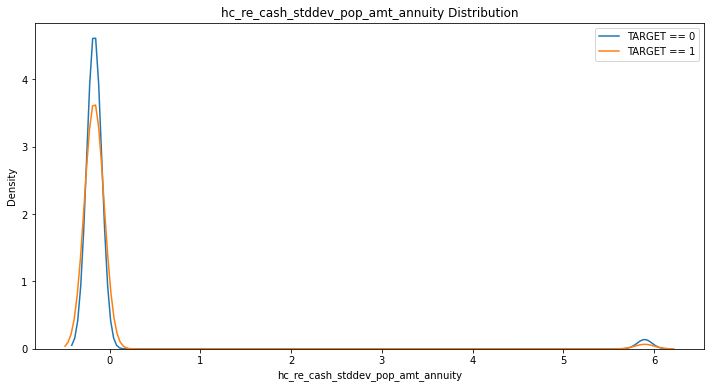

In [188]:
kde_target('hc_re_cash_stddev_pop_amt_annuity', app_train)

### hc_re_cash_var_pop_amt_annuity

In [189]:
### Originから切り戻し
app_train['hc_re_cash_var_pop_amt_annuity'] = app_train_origin['hc_re_cash_var_pop_amt_annuity'].copy()
app_test['hc_re_cash_var_pop_amt_annuity'] = app_test_origin['hc_re_cash_var_pop_amt_annuity'].copy()
app_train['hc_re_cash_var_pop_amt_annuity'].isnull().sum()

298907

In [190]:
app_train['hc_re_cash_var_pop_amt_annuity'].value_counts()

0.000000e+00    4879
2.156797e+05       1
9.828973e+07       1
7.617843e+07       1
2.037387e+07       1
                ... 
7.391562e+08       1
5.136415e+07       1
5.901033e+06       1
7.373320e+06       1
1.264617e+08       1
Name: hc_re_cash_var_pop_amt_annuity, Length: 3726, dtype: int64

In [191]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_var_pop_amt_annuity
TARGET,1.000000,-0.010294
hc_re_cash_var_pop_amt_annuity,-0.010294,1.000000


In [192]:
### -999埋めで欠損値補完
app_train['hc_re_cash_var_pop_amt_annuity'] = app_train['hc_re_cash_var_pop_amt_annuity'].fillna(-999)
app_test['hc_re_cash_var_pop_amt_annuity'] = app_test['hc_re_cash_var_pop_amt_annuity'].fillna(-999)
app_train['hc_re_cash_var_pop_amt_annuity'].isnull().sum()

0

In [193]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_var_pop_amt_annuity
TARGET,1.000000,-0.005273
hc_re_cash_var_pop_amt_annuity,-0.005273,1.000000


In [194]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_var_pop_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_var_pop_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_var_pop_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_var_pop_amt_annuity']].corr()

,TARGET,hc_re_cash_var_pop_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_var_pop_amt_annuity,-0.01756,1.00000


In [195]:
## 標準化
num_cols = ['hc_re_cash_var_pop_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_var_pop_amt_annuity', 'TARGET']].corr()

,hc_re_cash_var_pop_amt_annuity,TARGET
hc_re_cash_var_pop_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_var_pop_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


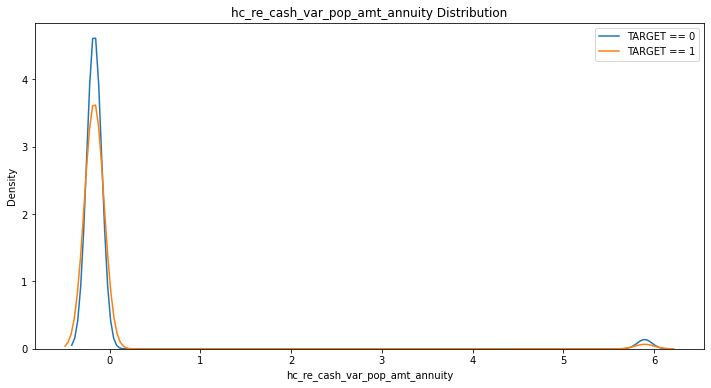

In [196]:
kde_target('hc_re_cash_var_pop_amt_annuity', app_train)

### hc_re_cash_var_samp_amt_annuity

In [197]:
### Originから切り戻し
app_train['hc_re_cash_var_samp_amt_annuity'] = app_train_origin['hc_re_cash_var_samp_amt_annuity'].copy()
app_test['hc_re_cash_var_samp_amt_annuity'] = app_test_origin['hc_re_cash_var_samp_amt_annuity'].copy()
app_train['hc_re_cash_var_samp_amt_annuity'].isnull().sum()

298907

In [198]:
app_train['hc_re_cash_var_samp_amt_annuity'].value_counts()

0.000000e+00    4879
2.165821e+05       1
1.040715e+08       1
7.664578e+07       1
2.041486e+07       1
                ... 
7.441845e+08       1
5.155510e+07       1
5.919886e+06       1
7.383898e+06       1
1.266347e+08       1
Name: hc_re_cash_var_samp_amt_annuity, Length: 3726, dtype: int64

In [42]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_var_samp_amt_annuity
TARGET,1.00000,0.00127
hc_re_cash_var_samp_amt_annuity,0.00127,1.00000


In [199]:
### -999埋めで欠損値補完
app_train['hc_re_cash_var_samp_amt_annuity'] = app_train['hc_re_cash_var_samp_amt_annuity'].fillna(-999)
app_test['hc_re_cash_var_samp_amt_annuity'] = app_test['hc_re_cash_var_samp_amt_annuity'].fillna(-999)
app_train['hc_re_cash_var_samp_amt_annuity'].isnull().sum()

0

In [200]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_var_samp_amt_annuity
TARGET,1.000000,-0.005266
hc_re_cash_var_samp_amt_annuity,-0.005266,1.000000


In [201]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_var_samp_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_var_samp_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_var_samp_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_var_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_var_samp_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_var_samp_amt_annuity,-0.01756,1.00000


In [202]:
## 標準化
num_cols = ['hc_re_cash_var_samp_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_var_samp_amt_annuity', 'TARGET']].corr()

,hc_re_cash_var_samp_amt_annuity,TARGET
hc_re_cash_var_samp_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_var_samp_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


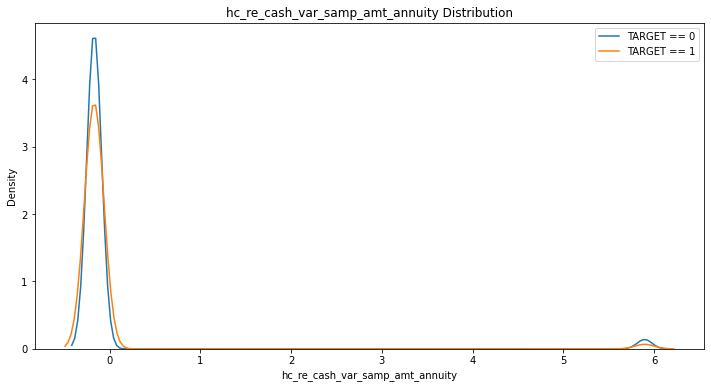

In [203]:
kde_target('hc_re_cash_var_samp_amt_annuity', app_train)

### hc_re_cash_variance_samp_amt_annuity

In [204]:
### Originから切り戻し
app_train['hc_re_cash_variance_samp_amt_annuity'] = app_train_origin['hc_re_cash_variance_samp_amt_annuity'].copy()
app_test['hc_re_cash_variance_samp_amt_annuity'] = app_test_origin['hc_re_cash_variance_samp_amt_annuity'].copy()
app_train['hc_re_cash_variance_samp_amt_annuity'].isnull().sum()

298907

In [205]:
app_train['hc_re_cash_variance_samp_amt_annuity'].value_counts()

0.000000e+00    4879
2.156797e+05       1
9.828973e+07       1
7.617843e+07       1
2.037387e+07       1
                ... 
7.391562e+08       1
5.136415e+07       1
5.901033e+06       1
7.373320e+06       1
1.264617e+08       1
Name: hc_re_cash_variance_samp_amt_annuity, Length: 3726, dtype: int64

In [206]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_variance_samp_amt_annuity
TARGET,1.000000,-0.010294
hc_re_cash_variance_samp_amt_annuity,-0.010294,1.000000


In [207]:
### -999埋めで欠損値補完
app_train['hc_re_cash_variance_samp_amt_annuity'] = app_train['hc_re_cash_variance_samp_amt_annuity'].fillna(-999)
app_test['hc_re_cash_variance_samp_amt_annuity'] = app_test['hc_re_cash_variance_samp_amt_annuity'].fillna(-999)
app_train['hc_re_cash_variance_samp_amt_annuity'].isnull().sum()

0

In [208]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_variance_samp_amt_annuity
TARGET,1.000000,-0.005273
hc_re_cash_variance_samp_amt_annuity,-0.005273,1.000000


In [209]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_variance_samp_amt_annuity']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_variance_samp_amt_annuity'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_variance_samp_amt_annuity'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_annuity']].corr()

,TARGET,hc_re_cash_variance_samp_amt_annuity
TARGET,1.00000,-0.01756
hc_re_cash_variance_samp_amt_annuity,-0.01756,1.00000


In [210]:
## 標準化
num_cols = ['hc_re_cash_variance_samp_amt_annuity']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_variance_samp_amt_annuity', 'TARGET']].corr()

,hc_re_cash_variance_samp_amt_annuity,TARGET
hc_re_cash_variance_samp_amt_annuity,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_variance_samp_amt_annuity and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


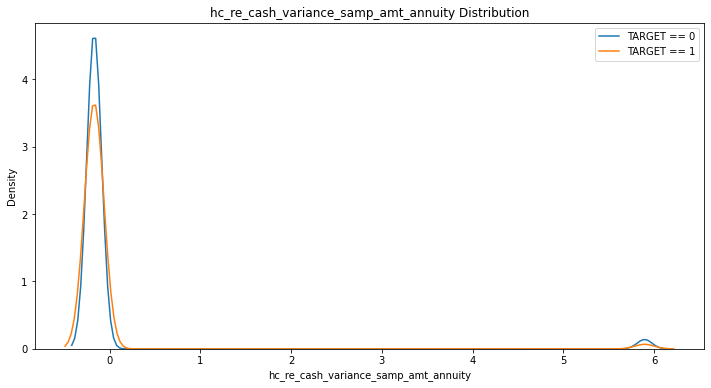

In [211]:
kde_target('hc_re_cash_variance_samp_amt_annuity', app_train)

### hc_re_cash_max_amt_application

In [212]:
### Originから切り戻し
app_train['hc_re_cash_max_amt_application'] = app_train_origin['hc_re_cash_max_amt_application'].copy()
app_test['hc_re_cash_max_amt_application'] = app_test_origin['hc_re_cash_max_amt_application'].copy()
app_train['hc_re_cash_max_amt_application'].isnull().sum()

298907

In [213]:
app_train['hc_re_cash_max_amt_application'].value_counts()

450000.0     646
135000.0     495
225000.0     474
675000.0     437
90000.0      374
            ... 
1399500.0      1
859500.0       1
2074500.0      1
1071000.0      1
976500.0       1
Name: hc_re_cash_max_amt_application, Length: 345, dtype: int64

In [48]:
app_train[['TARGET', 'hc_re_cash_max_amt_application']].corr()

,TARGET,hc_re_cash_max_amt_application
TARGET,1.000000,-0.002424
hc_re_cash_max_amt_application,-0.002424,1.000000


In [214]:
### -999埋めで欠損値補完
app_train['hc_re_cash_max_amt_application'] = app_train['hc_re_cash_max_amt_application'].fillna(-999)
app_test['hc_re_cash_max_amt_application'] = app_test['hc_re_cash_max_amt_application'].fillna(-999)
app_train['hc_re_cash_max_amt_application'].isnull().sum()

0

In [215]:
app_train[['TARGET', 'hc_re_cash_max_amt_application']].corr()

,TARGET,hc_re_cash_max_amt_application
TARGET,1.000000,-0.016025
hc_re_cash_max_amt_application,-0.016025,1.000000


In [216]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_max_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_max_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_max_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_max_amt_application']].corr()

,TARGET,hc_re_cash_max_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_max_amt_application,-0.01756,1.00000


In [217]:
## 標準化
num_cols = ['hc_re_cash_max_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_max_amt_application', 'TARGET']].corr()

,hc_re_cash_max_amt_application,TARGET
hc_re_cash_max_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_max_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


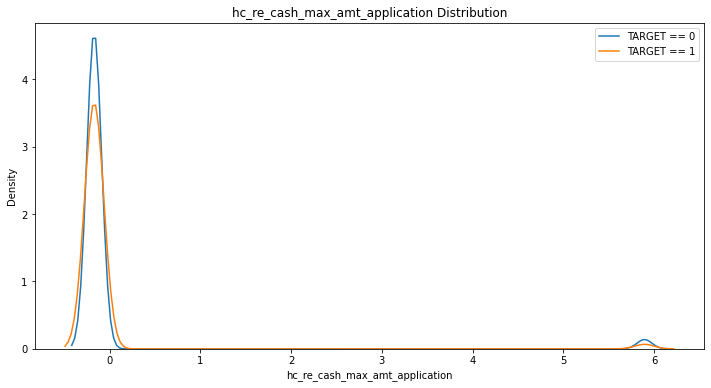

In [218]:
kde_target('hc_re_cash_max_amt_application', app_train)

### hc_re_cash_min_amt_application

In [219]:
### Originから切り戻し
app_train['hc_re_cash_min_amt_application'] = app_train_origin['hc_re_cash_min_amt_application'].copy()
app_test['hc_re_cash_min_amt_application'] = app_test_origin['hc_re_cash_min_amt_application'].copy()
app_train['hc_re_cash_min_amt_application'].isnull().sum()

298907

In [220]:
app_train['hc_re_cash_min_amt_application'].value_counts()

135000.0     777
45000.0      701
90000.0      671
225000.0     552
450000.0     539
            ... 
1363500.0      1
1048500.0      1
985500.0       1
648000.0       1
976500.0       1
Name: hc_re_cash_min_amt_application, Length: 269, dtype: int64

In [221]:
app_train[['TARGET', 'hc_re_cash_min_amt_application']].corr()

,TARGET,hc_re_cash_min_amt_application
TARGET,1.000000,-0.026454
hc_re_cash_min_amt_application,-0.026454,1.000000


In [222]:
### -999埋めで欠損値補完
app_train['hc_re_cash_min_amt_application'] = app_train['hc_re_cash_min_amt_application'].fillna(-999)
app_test['hc_re_cash_min_amt_application'] = app_test['hc_re_cash_min_amt_application'].fillna(-999)
app_train['hc_re_cash_min_amt_application'].isnull().sum()

0

In [223]:
app_train[['TARGET', 'hc_re_cash_min_amt_application']].corr()

,TARGET,hc_re_cash_min_amt_application
TARGET,1.000000,-0.014818
hc_re_cash_min_amt_application,-0.014818,1.000000


In [224]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_min_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_min_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_min_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_min_amt_application']].corr()

,TARGET,hc_re_cash_min_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_min_amt_application,-0.01756,1.00000


In [225]:
## 標準化
num_cols = ['hc_re_cash_min_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_min_amt_application', 'TARGET']].corr()

,hc_re_cash_min_amt_application,TARGET
hc_re_cash_min_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_min_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


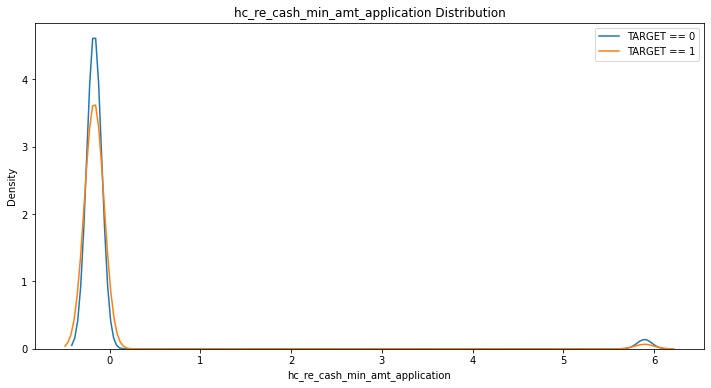

In [226]:
kde_target('hc_re_cash_min_amt_application', app_train)

### hc_re_cash_sum_amt_application

In [227]:
### Originから切り戻し
app_train['hc_re_cash_sum_amt_application'] = app_train_origin['hc_re_cash_sum_amt_application'].copy()
app_test['hc_re_cash_sum_amt_application'] = app_test_origin['hc_re_cash_sum_amt_application'].copy()
app_train['hc_re_cash_sum_amt_application'].isnull().sum()

298907

In [228]:
app_train['hc_re_cash_sum_amt_application'].value_counts()

2700000.0      47
4050000.0      43
16200000.0     41
1890000.0      39
5400000.0      37
               ..
29565000.0      1
731250000.0     1
136516500.0     1
338850000.0     1
460215000.0     1
Name: hc_re_cash_sum_amt_application, Length: 4832, dtype: int64

In [229]:
app_train[['TARGET', 'hc_re_cash_sum_amt_application']].corr()

,TARGET,hc_re_cash_sum_amt_application
TARGET,1.000000,-0.020034
hc_re_cash_sum_amt_application,-0.020034,1.000000


In [230]:
### -999埋めで欠損値補完
app_train['hc_re_cash_sum_amt_application'] = app_train['hc_re_cash_sum_amt_application'].fillna(-999)
app_test['hc_re_cash_sum_amt_application'] = app_test['hc_re_cash_sum_amt_application'].fillna(-999)
app_train['hc_re_cash_sum_amt_application'].isnull().sum()

0

In [231]:
app_train[['TARGET', 'hc_re_cash_sum_amt_application']].corr()

,TARGET,hc_re_cash_sum_amt_application
TARGET,1.000000,-0.011026
hc_re_cash_sum_amt_application,-0.011026,1.000000


In [232]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_sum_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_sum_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_sum_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_sum_amt_application']].corr()

,TARGET,hc_re_cash_sum_amt_application
TARGET,1.000000,-0.017568
hc_re_cash_sum_amt_application,-0.017568,1.000000


In [233]:
## 標準化
num_cols = ['hc_re_cash_sum_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_sum_amt_application', 'TARGET']].corr()

,hc_re_cash_sum_amt_application,TARGET
hc_re_cash_sum_amt_application,1.000000,-0.017568
TARGET,-0.017568,1.000000


The correlation between hc_re_cash_sum_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


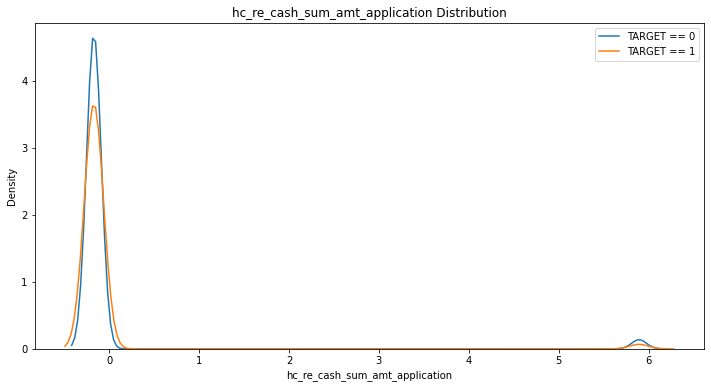

In [234]:
kde_target('hc_re_cash_sum_amt_application', app_train)

### hc_re_cash_avg_amt_application

In [235]:
### Originから切り戻し
app_train['hc_re_cash_avg_amt_application'] = app_train_origin['hc_re_cash_avg_amt_application'].copy()
app_test['hc_re_cash_avg_amt_application'] = app_test_origin['hc_re_cash_avg_amt_application'].copy()
app_train['hc_re_cash_avg_amt_application'].isnull().sum()

298907

In [236]:
app_train['hc_re_cash_avg_amt_application'].value_counts()

1.350000e+05    386
4.500000e+05    376
2.250000e+05    351
9.000000e+04    299
6.750000e+05    231
               ... 
1.260078e+06      1
7.988699e+05      1
5.364474e+05      1
6.149270e+05      1
6.287090e+05      1
Name: hc_re_cash_avg_amt_application, Length: 3724, dtype: int64

In [237]:
app_train[['TARGET', 'hc_re_cash_avg_amt_application']].corr()

,TARGET,hc_re_cash_avg_amt_application
TARGET,1.000000,-0.028931
hc_re_cash_avg_amt_application,-0.028931,1.000000


In [238]:
### -999埋めで欠損値補完
app_train['hc_re_cash_avg_amt_application'] = app_train['hc_re_cash_avg_amt_application'].fillna(-999)
app_test['hc_re_cash_avg_amt_application'] = app_test['hc_re_cash_avg_amt_application'].fillna(-999)
app_train['hc_re_cash_avg_amt_application'].isnull().sum()

0

In [239]:
app_train[['TARGET', 'hc_re_cash_avg_amt_application']].corr()

,TARGET,hc_re_cash_avg_amt_application
TARGET,1.000000,-0.015873
hc_re_cash_avg_amt_application,-0.015873,1.000000


In [240]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_avg_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_avg_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_avg_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_avg_amt_application']].corr()

,TARGET,hc_re_cash_avg_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_avg_amt_application,-0.01756,1.00000


In [241]:
## 標準化
num_cols = ['hc_re_cash_avg_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_avg_amt_application', 'TARGET']].corr()

,hc_re_cash_avg_amt_application,TARGET
hc_re_cash_avg_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_avg_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


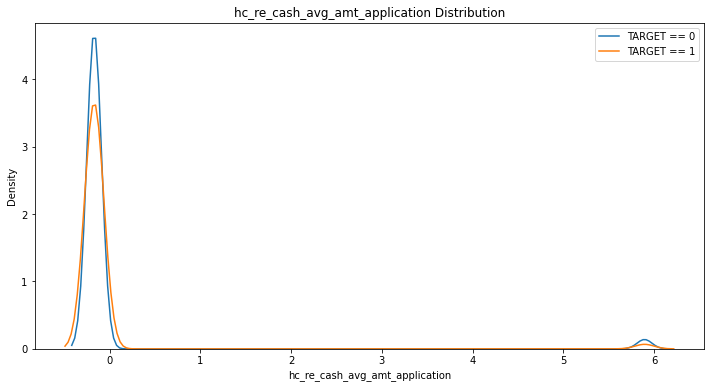

In [242]:
kde_target('hc_re_cash_avg_amt_application', app_train)

### hc_re_cash_cnt_amt_application

In [243]:
### Originから切り戻し
app_train['hc_re_cash_cnt_amt_application'] = app_train_origin['hc_re_cash_cnt_amt_application'].copy()
app_test['hc_re_cash_cnt_amt_application'] = app_test_origin['hc_re_cash_cnt_amt_application'].copy()
app_train['hc_re_cash_cnt_amt_application'].isnull().sum()

298907

In [244]:
app_train['hc_re_cash_cnt_amt_application'].value_counts()

156.0     246
42.0      223
56.0      167
36.0      143
64.0      143
         ... 
998.0       1
1521.0      1
2154.0      1
577.0       1
842.0       1
Name: hc_re_cash_cnt_amt_application, Length: 1392, dtype: int64

In [245]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_application']].corr()

,TARGET,hc_re_cash_cnt_amt_application
TARGET,1.000000,-0.022536
hc_re_cash_cnt_amt_application,-0.022536,1.000000


In [247]:
### -999埋めで欠損値補完
app_train['hc_re_cash_cnt_amt_application'] = app_train['hc_re_cash_cnt_amt_application'].fillna(-999)
app_test['hc_re_cash_cnt_amt_application'] = app_test['hc_re_cash_cnt_amt_application'].fillna(-999)
app_train['hc_re_cash_cnt_amt_application'].isnull().sum()

0

In [248]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_application']].corr()

,TARGET,hc_re_cash_cnt_amt_application
TARGET,1.000000,-0.017579
hc_re_cash_cnt_amt_application,-0.017579,1.000000


In [249]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_cnt_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_cnt_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_cnt_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_cnt_amt_application']].corr()

,TARGET,hc_re_cash_cnt_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_cnt_amt_application,-0.01756,1.00000


In [250]:
## 標準化
num_cols = ['hc_re_cash_cnt_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_cnt_amt_application', 'TARGET']].corr()

,hc_re_cash_cnt_amt_application,TARGET
hc_re_cash_cnt_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_cnt_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


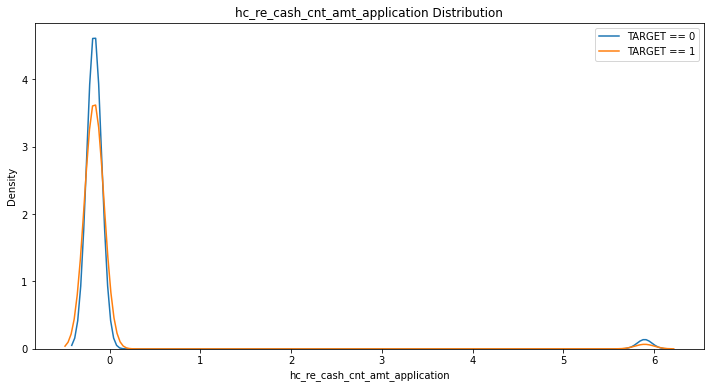

In [251]:
kde_target('hc_re_cash_cnt_amt_application', app_train)

### hc_re_cash_stddev_amt_application

In [252]:
### Originから切り戻し
app_train['hc_re_cash_stddev_amt_application'] = app_train_origin['hc_re_cash_stddev_amt_application'].copy()
app_test['hc_re_cash_stddev_amt_application'] = app_test_origin['hc_re_cash_stddev_amt_application'].copy()
app_train['hc_re_cash_stddev_amt_application'].isnull().sum()

298907

In [253]:
app_train['hc_re_cash_stddev_amt_application'].value_counts()

0.000000         5004
79363.467666        3
22481.992794        2
11589.271957        2
11210.869447        2
                 ... 
44728.964220        1
347461.004434       1
132543.354208       1
26454.489222        1
119417.229723       1
Name: hc_re_cash_stddev_amt_application, Length: 3583, dtype: int64

In [254]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_application']].corr()

,TARGET,hc_re_cash_stddev_amt_application
TARGET,1.00000,-0.00766
hc_re_cash_stddev_amt_application,-0.00766,1.00000


In [255]:
### -999埋めで欠損値補完
app_train['hc_re_cash_stddev_amt_application'] = app_train['hc_re_cash_stddev_amt_application'].fillna(-999)
app_test['hc_re_cash_stddev_amt_application'] = app_test['hc_re_cash_stddev_amt_application'].fillna(-999)
app_train['hc_re_cash_stddev_amt_application'].isnull().sum()

0

In [256]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_application']].corr()

,TARGET,hc_re_cash_stddev_amt_application
TARGET,1.00000,-0.00904
hc_re_cash_stddev_amt_application,-0.00904,1.00000


In [257]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_stddev_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_stddev_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_stddev_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_stddev_amt_application']].corr()

,TARGET,hc_re_cash_stddev_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_stddev_amt_application,-0.01756,1.00000


In [258]:
## 標準化
num_cols = ['hc_re_cash_stddev_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_stddev_amt_application', 'TARGET']].corr()

,hc_re_cash_stddev_amt_application,TARGET
hc_re_cash_stddev_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_stddev_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


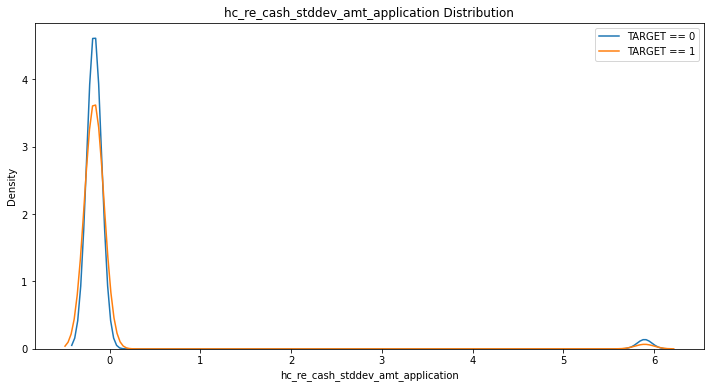

In [259]:
kde_target('hc_re_cash_stddev_amt_application', app_train)

### hc_re_cash_stddev_pop_amt_application

In [260]:
### Originから切り戻し
app_train['hc_re_cash_stddev_pop_amt_application'] = app_train_origin['hc_re_cash_stddev_pop_amt_application'].copy()
app_test['hc_re_cash_stddev_pop_amt_application'] = app_test_origin['hc_re_cash_stddev_pop_amt_application'].copy()
app_train['hc_re_cash_stddev_pop_amt_application'].isnull().sum()

298907

In [261]:
app_train['hc_re_cash_stddev_pop_amt_application'].value_counts()

0.000000         5004
79363.467666        3
22481.992794        2
11589.271957        2
11210.869447        2
                 ... 
44728.964220        1
347461.004434       1
132543.354208       1
26454.489222        1
119417.229723       1
Name: hc_re_cash_stddev_pop_amt_application, Length: 3583, dtype: int64

In [262]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_application']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_application
TARGET,1.00000,-0.00766
hc_re_cash_stddev_pop_amt_application,-0.00766,1.00000


In [263]:
### -999埋めで欠損値補完
app_train['hc_re_cash_stddev_pop_amt_application'] = app_train['hc_re_cash_stddev_pop_amt_application'].fillna(-999)
app_test['hc_re_cash_stddev_pop_amt_application'] = app_test['hc_re_cash_stddev_pop_amt_application'].fillna(-999)
app_train['hc_re_cash_stddev_pop_amt_application'].isnull().sum()

0

In [264]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_application']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_application
TARGET,1.00000,-0.00904
hc_re_cash_stddev_pop_amt_application,-0.00904,1.00000


In [265]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_stddev_pop_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_stddev_pop_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_stddev_pop_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_application']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_stddev_pop_amt_application,-0.01756,1.00000


In [266]:
## 標準化
num_cols = ['hc_re_cash_stddev_pop_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_stddev_pop_amt_application', 'TARGET']].corr()

,hc_re_cash_stddev_pop_amt_application,TARGET
hc_re_cash_stddev_pop_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_stddev_pop_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


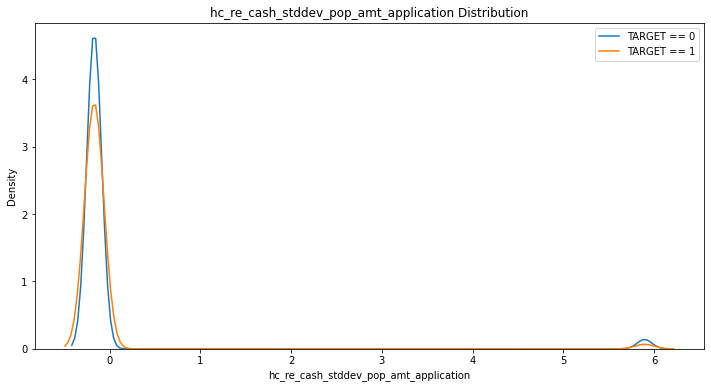

In [267]:
kde_target('hc_re_cash_stddev_pop_amt_application', app_train)

### hc_re_cash_var_pop_amt_application

In [268]:
### Originから切り戻し
app_train['hc_re_cash_var_pop_amt_application'] = app_train_origin['hc_re_cash_var_pop_amt_application'].copy()
app_test['hc_re_cash_var_pop_amt_application'] = app_test_origin['hc_re_cash_var_pop_amt_application'].copy()
app_train['hc_re_cash_var_pop_amt_application'].isnull().sum()

298907

In [269]:
app_train['hc_re_cash_var_pop_amt_application'].value_counts()

0.000000e+00    5004
2.450000e+10       2
2.025000e+09       2
5.054400e+08       2
1.263600e+08       2
                ... 
6.460794e+09       1
2.000680e+09       1
1.207291e+11       1
1.756774e+10       1
1.426047e+10       1
Name: hc_re_cash_var_pop_amt_application, Length: 3592, dtype: int64

In [270]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_application']].corr()

,TARGET,hc_re_cash_var_pop_amt_application
TARGET,1.000000,-0.008843
hc_re_cash_var_pop_amt_application,-0.008843,1.000000


In [271]:
### -999埋めで欠損値補完
app_train['hc_re_cash_var_pop_amt_application'] = app_train['hc_re_cash_var_pop_amt_application'].fillna(-999)
app_test['hc_re_cash_var_pop_amt_application'] = app_test['hc_re_cash_var_pop_amt_application'].fillna(-999)
app_train['hc_re_cash_var_pop_amt_application'].isnull().sum()

0

In [272]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_application']].corr()

,TARGET,hc_re_cash_var_pop_amt_application
TARGET,1.000000,-0.006159
hc_re_cash_var_pop_amt_application,-0.006159,1.000000


In [273]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_var_pop_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_var_pop_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_var_pop_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_var_pop_amt_application']].corr()

,TARGET,hc_re_cash_var_pop_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_var_pop_amt_application,-0.01756,1.00000


In [274]:
## 標準化
num_cols = ['hc_re_cash_var_pop_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_var_pop_amt_application', 'TARGET']].corr()

,hc_re_cash_var_pop_amt_application,TARGET
hc_re_cash_var_pop_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_var_pop_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


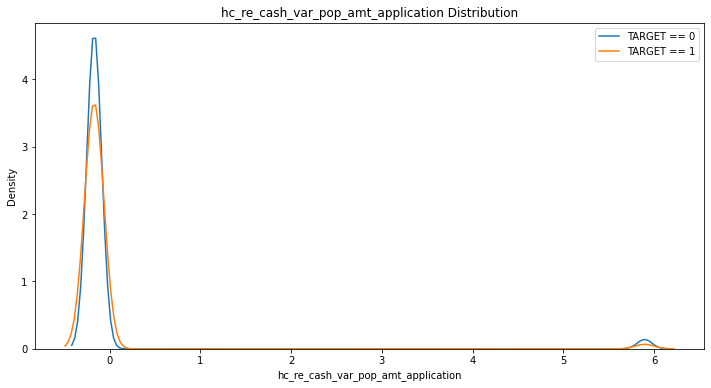

In [275]:
kde_target('hc_re_cash_var_pop_amt_application', app_train)

### hc_re_cash_var_samp_amt_application

In [276]:
### Originから切り戻し
app_train['hc_re_cash_var_samp_amt_application'] = app_train_origin['hc_re_cash_var_samp_amt_application'].copy()
app_test['hc_re_cash_var_samp_amt_application'] = app_test_origin['hc_re_cash_var_samp_amt_application'].copy()
app_train['hc_re_cash_var_samp_amt_application'].isnull().sum()

298907

In [277]:
app_train['hc_re_cash_var_samp_amt_application'].value_counts()

0.000000e+00    5004
5.071304e+08       2
1.351155e+08       2
2.049398e+09       2
2.780192e+10       1
                ... 
2.004112e+09       1
1.208254e+11       1
1.765924e+10       1
7.045369e+08       1
1.427998e+10       1
Name: hc_re_cash_var_samp_amt_application, Length: 3598, dtype: int64

In [278]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_application']].corr()

,TARGET,hc_re_cash_var_samp_amt_application
TARGET,1.000000,-0.008661
hc_re_cash_var_samp_amt_application,-0.008661,1.000000


In [279]:
### -999埋めで欠損値補完
app_train['hc_re_cash_var_samp_amt_application'] = app_train['hc_re_cash_var_samp_amt_application'].fillna(-999)
app_test['hc_re_cash_var_samp_amt_application'] = app_test['hc_re_cash_var_samp_amt_application'].fillna(-999)
app_train['hc_re_cash_var_samp_amt_application'].isnull().sum()

0

In [280]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_application']].corr()

,TARGET,hc_re_cash_var_samp_amt_application
TARGET,1.000000,-0.006134
hc_re_cash_var_samp_amt_application,-0.006134,1.000000


In [281]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_var_samp_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_var_samp_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_var_samp_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_var_samp_amt_application']].corr()

,TARGET,hc_re_cash_var_samp_amt_application
TARGET,1.00000,-0.01756
hc_re_cash_var_samp_amt_application,-0.01756,1.00000


In [282]:
## 標準化
num_cols = ['hc_re_cash_var_samp_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_var_samp_amt_application', 'TARGET']].corr()

,hc_re_cash_var_samp_amt_application,TARGET
hc_re_cash_var_samp_amt_application,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_var_samp_amt_application and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


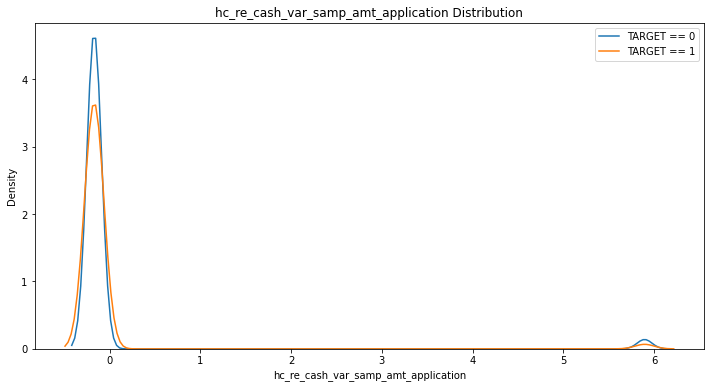

In [283]:
kde_target('hc_re_cash_var_samp_amt_application', app_train)

### hc_re_cash_variance_samp_amt_application

In [289]:
### Originから切り戻し
app_train['hc_re_cash_variance_samp_amt_application'] = app_train_origin['hc_re_cash_variance_samp_amt_application'].copy()
app_test['hc_re_cash_variance_samp_amt_application'] = app_test_origin['hc_re_cash_variance_samp_amt_application'].copy()
app_train['hc_re_cash_variance_samp_amt_application'].isnull().sum()

298907

In [290]:
app_train['hc_re_cash_variance_samp_amt_application'].value_counts()

0.000000e+00    5004
2.450000e+10       2
2.025000e+09       2
5.054400e+08       2
1.263600e+08       2
                ... 
6.460794e+09       1
2.000680e+09       1
1.207291e+11       1
1.756774e+10       1
1.426047e+10       1
Name: hc_re_cash_variance_samp_amt_application, Length: 3592, dtype: int64

In [291]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_application']].corr()

,TARGET,hc_re_cash_variance_samp_amt_application
TARGET,1.000000,-0.008843
hc_re_cash_variance_samp_amt_application,-0.008843,1.000000


In [292]:
### 0埋めで欠損値補完
app_train['hc_re_cash_variance_samp_amt_application'] = app_train['hc_re_cash_variance_samp_amt_application'].fillna(0)
app_test['hc_re_cash_variance_samp_amt_application'] = app_test['hc_re_cash_variance_samp_amt_application'].fillna(0)
app_train['hc_re_cash_variance_samp_amt_application'].isnull().sum()

0

In [293]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_application']].corr()

,TARGET,hc_re_cash_variance_samp_amt_application
TARGET,1.000000,-0.006159
hc_re_cash_variance_samp_amt_application,-0.006159,1.000000


In [294]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_variance_samp_amt_application']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_variance_samp_amt_application'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_variance_samp_amt_application'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_application']].corr()

,TARGET,hc_re_cash_variance_samp_amt_application
TARGET,1.000000,-0.010834
hc_re_cash_variance_samp_amt_application,-0.010834,1.000000


In [295]:
## 標準化
num_cols = ['hc_re_cash_variance_samp_amt_application']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_variance_samp_amt_application', 'TARGET']].corr()

,hc_re_cash_variance_samp_amt_application,TARGET
hc_re_cash_variance_samp_amt_application,1.000000,-0.010834
TARGET,-0.010834,1.000000


The correlation between hc_re_cash_variance_samp_amt_application and the TARGET is -0.0108
Median value for loan that was not repaid = -0.1088
Median value for loan that was repaid =     -0.1088


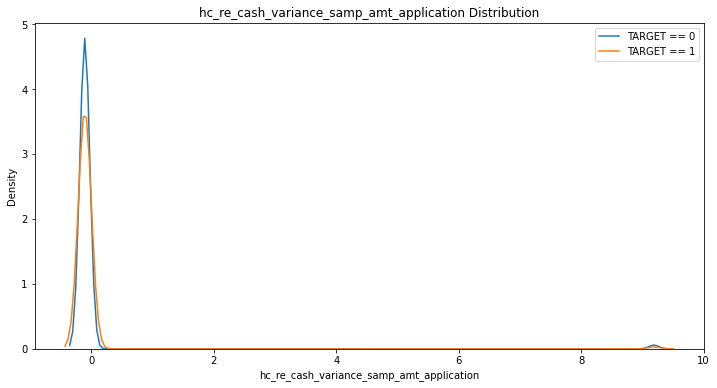

In [296]:
kde_target('hc_re_cash_variance_samp_amt_application', app_train)

### hc_re_cash_max_amt_credit

In [297]:
### Originから切り戻し
app_train['hc_re_cash_max_amt_credit'] = app_train_origin['hc_re_cash_max_amt_credit'].copy()
app_test['hc_re_cash_max_amt_credit'] = app_test_origin['hc_re_cash_max_amt_credit'].copy()
app_train['hc_re_cash_max_amt_credit'].isnull().sum()

298907

In [298]:
app_train['hc_re_cash_max_amt_credit'].value_counts()

512370.0    102
450000.0    100
95940.0      91
744498.0     91
143910.0     91
           ... 
807894.0      1
513715.5      1
790839.0      1
841554.0      1
887017.5      1
Name: hc_re_cash_max_amt_credit, Length: 2483, dtype: int64

In [299]:
app_train[['TARGET', 'hc_re_cash_max_amt_credit']].corr()

,TARGET,hc_re_cash_max_amt_credit
TARGET,1.000000,-0.024386
hc_re_cash_max_amt_credit,-0.024386,1.000000


In [300]:
### -999埋めで欠損値補完
app_train['hc_re_cash_max_amt_credit'] = app_train['hc_re_cash_max_amt_credit'].fillna(-999)
app_test['hc_re_cash_max_amt_credit'] = app_test['hc_re_cash_max_amt_credit'].fillna(-999)
app_train['hc_re_cash_max_amt_credit'].isnull().sum()

0

In [301]:
app_train[['TARGET', 'hc_re_cash_max_amt_credit']].corr()

,TARGET,hc_re_cash_max_amt_credit
TARGET,1.00000,-0.01576
hc_re_cash_max_amt_credit,-0.01576,1.00000


In [302]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_max_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_max_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_max_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_max_amt_credit']].corr()

,TARGET,hc_re_cash_max_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_max_amt_credit,-0.01756,1.00000


In [303]:
## 標準化
num_cols = ['hc_re_cash_max_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_max_amt_credit', 'TARGET']].corr()

,hc_re_cash_max_amt_credit,TARGET
hc_re_cash_max_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_max_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


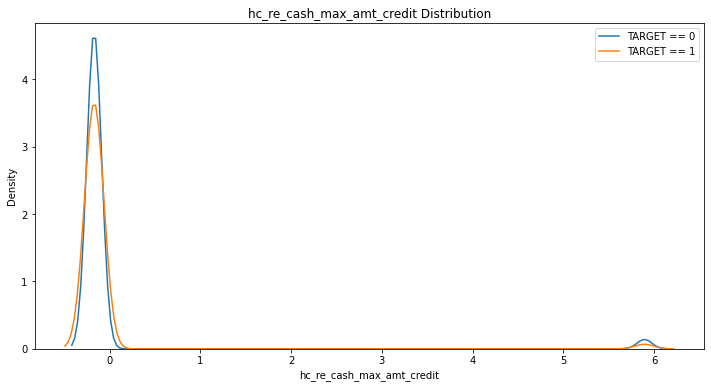

In [304]:
kde_target('hc_re_cash_max_amt_credit', app_train)

### hc_re_cash_min_amt_credit

In [305]:
### Originから切り戻し
app_train['hc_re_cash_min_amt_credit'] = app_train_origin['hc_re_cash_min_amt_credit'].copy()
app_test['hc_re_cash_min_amt_credit'] = app_test_origin['hc_re_cash_min_amt_credit'].copy()
app_train['hc_re_cash_min_amt_credit'].isnull().sum()

298907

In [306]:
app_train['hc_re_cash_min_amt_credit'].value_counts()

95940.0      174
47970.0      154
46485.0      148
143910.0     133
71955.0      122
            ... 
1199862.0      1
118147.5       1
798165.0       1
750775.5       1
1118286.0      1
Name: hc_re_cash_min_amt_credit, Length: 2132, dtype: int64

In [307]:
app_train[['TARGET', 'hc_re_cash_min_amt_credit']].corr()

,TARGET,hc_re_cash_min_amt_credit
TARGET,1.000000,-0.022242
hc_re_cash_min_amt_credit,-0.022242,1.000000


In [308]:
### -999埋めで欠損値補完
app_train['hc_re_cash_min_amt_credit'] = app_train['hc_re_cash_min_amt_credit'].fillna(-999)
app_test['hc_re_cash_min_amt_credit'] = app_test['hc_re_cash_min_amt_credit'].fillna(-999)
app_train['hc_re_cash_min_amt_credit'].isnull().sum()

0

In [309]:
app_train[['TARGET', 'hc_re_cash_min_amt_credit']].corr()

,TARGET,hc_re_cash_min_amt_credit
TARGET,1.000000,-0.014549
hc_re_cash_min_amt_credit,-0.014549,1.000000


In [310]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_min_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_min_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_min_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_min_amt_credit']].corr()

,TARGET,hc_re_cash_min_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_min_amt_credit,-0.01756,1.00000


In [311]:
## 標準化
num_cols = ['hc_re_cash_min_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_min_amt_credit', 'TARGET']].corr()

,hc_re_cash_min_amt_credit,TARGET
hc_re_cash_min_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_min_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


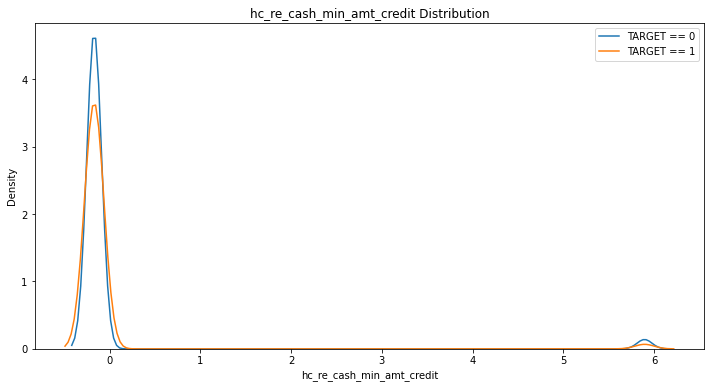

In [312]:
kde_target('hc_re_cash_min_amt_credit', app_train)

### hc_re_cash_sum_amt_credit

In [313]:
### Originから切り戻し
app_train['hc_re_cash_sum_amt_credit'] = app_train_origin['hc_re_cash_sum_amt_credit'].copy()
app_test['hc_re_cash_sum_amt_credit'] = app_test_origin['hc_re_cash_sum_amt_credit'].copy()
app_train['hc_re_cash_sum_amt_credit'].isnull().sum()

298907

In [314]:
app_train['hc_re_cash_sum_amt_credit'].value_counts()

1.952370e+06    19
2.244996e+07    13
5.857110e+06    12
3.741660e+07    11
1.496664e+07    10
                ..
2.910987e+08     1
1.005640e+09     1
3.965875e+07     1
2.634376e+08     1
4.982025e+08     1
Name: hc_re_cash_sum_amt_credit, Length: 7708, dtype: int64

In [315]:
app_train[['TARGET', 'hc_re_cash_sum_amt_credit']].corr()

,TARGET,hc_re_cash_sum_amt_credit
TARGET,1.000000,-0.019459
hc_re_cash_sum_amt_credit,-0.019459,1.000000


In [316]:
### -999埋めで欠損値補完
app_train['hc_re_cash_sum_amt_credit'] = app_train['hc_re_cash_sum_amt_credit'].fillna(-999)
app_test['hc_re_cash_sum_amt_credit'] = app_test['hc_re_cash_sum_amt_credit'].fillna(-999)
app_train['hc_re_cash_sum_amt_credit'].isnull().sum()

0

In [317]:
app_train[['TARGET', 'hc_re_cash_sum_amt_credit']].corr()

,TARGET,hc_re_cash_sum_amt_credit
TARGET,1.00000,-0.01112
hc_re_cash_sum_amt_credit,-0.01112,1.00000


In [318]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_sum_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_sum_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_sum_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_sum_amt_credit']].corr()

,TARGET,hc_re_cash_sum_amt_credit
TARGET,1.000000,-0.017567
hc_re_cash_sum_amt_credit,-0.017567,1.000000


In [319]:
## 標準化
num_cols = ['hc_re_cash_sum_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_sum_amt_credit', 'TARGET']].corr()

,hc_re_cash_sum_amt_credit,TARGET
hc_re_cash_sum_amt_credit,1.000000,-0.017567
TARGET,-0.017567,1.000000


The correlation between hc_re_cash_sum_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


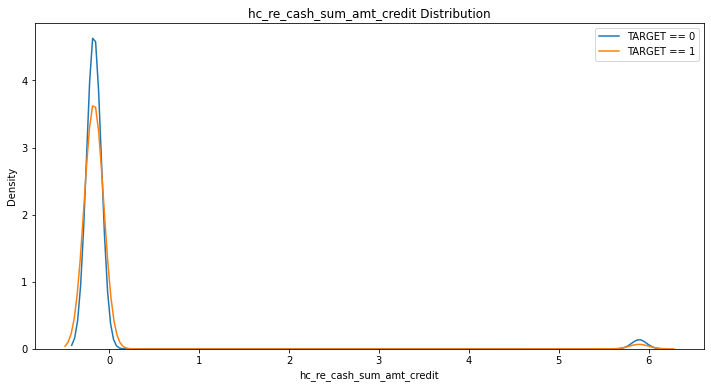

In [320]:
kde_target('hc_re_cash_sum_amt_credit', app_train)

### hc_re_cash_avg_amt_credit

In [321]:
### Originから切り戻し
app_train['hc_re_cash_avg_amt_credit'] = app_train_origin['hc_re_cash_avg_amt_credit'].copy()
app_test['hc_re_cash_avg_amt_credit'] = app_test_origin['hc_re_cash_avg_amt_credit'].copy()
app_train['hc_re_cash_avg_amt_credit'].isnull().sum()

298907

In [322]:
app_train['hc_re_cash_avg_amt_credit'].value_counts()

95940.000000     71
450000.000000    66
143910.000000    64
225000.000000    57
491580.000000    52
                 ..
677806.602240     1
108758.250000     1
577092.315789     1
893108.301954     1
680604.491803     1
Name: hc_re_cash_avg_amt_credit, Length: 5370, dtype: int64

In [323]:
app_train[['TARGET', 'hc_re_cash_avg_amt_credit']].corr()

,TARGET,hc_re_cash_avg_amt_credit
TARGET,1.000000,-0.024452
hc_re_cash_avg_amt_credit,-0.024452,1.000000


In [324]:
### -999埋めで欠損値補完
app_train['hc_re_cash_avg_amt_credit'] = app_train['hc_re_cash_avg_amt_credit'].fillna(-999)
app_test['hc_re_cash_avg_amt_credit'] = app_test['hc_re_cash_avg_amt_credit'].fillna(-999)
app_train['hc_re_cash_avg_amt_credit'].isnull().sum()

0

In [325]:
app_train[['TARGET', 'hc_re_cash_avg_amt_credit']].corr()

,TARGET,hc_re_cash_avg_amt_credit
TARGET,1.000000,-0.015616
hc_re_cash_avg_amt_credit,-0.015616,1.000000


In [326]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_avg_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_avg_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_avg_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_avg_amt_credit']].corr()

,TARGET,hc_re_cash_avg_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_avg_amt_credit,-0.01756,1.00000


In [327]:
## 標準化
num_cols = ['hc_re_cash_avg_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_avg_amt_credit', 'TARGET']].corr()

,hc_re_cash_avg_amt_credit,TARGET
hc_re_cash_avg_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_avg_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


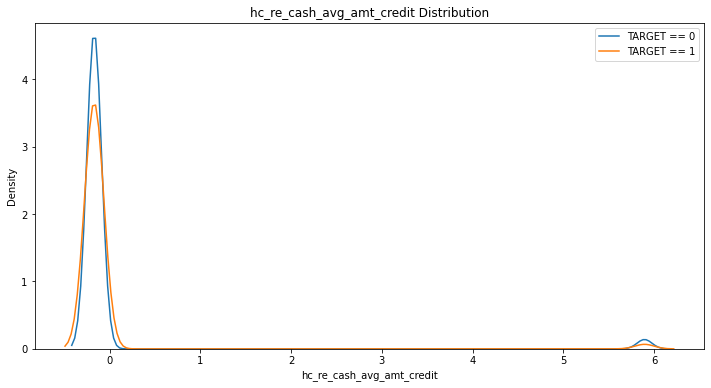

In [328]:
kde_target('hc_re_cash_avg_amt_credit', app_train)

### hc_re_cash_cnt_amt_credit

In [329]:
### Originから切り戻し
app_train['hc_re_cash_cnt_amt_credit'] = app_train_origin['hc_re_cash_cnt_amt_credit'].copy()
app_test['hc_re_cash_cnt_amt_credit'] = app_test_origin['hc_re_cash_cnt_amt_credit'].copy()
app_train['hc_re_cash_cnt_amt_credit'].isnull().sum()

298907

In [330]:
app_train['hc_re_cash_cnt_amt_credit'].value_counts()

156.0     246
42.0      223
56.0      167
36.0      143
64.0      143
         ... 
998.0       1
1521.0      1
2154.0      1
577.0       1
842.0       1
Name: hc_re_cash_cnt_amt_credit, Length: 1392, dtype: int64

In [331]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_credit']].corr()

,TARGET,hc_re_cash_cnt_amt_credit
TARGET,1.000000,-0.022536
hc_re_cash_cnt_amt_credit,-0.022536,1.000000


In [332]:
### -999埋めで欠損値補完
app_train['hc_re_cash_cnt_amt_credit'] = app_train['hc_re_cash_cnt_amt_credit'].fillna(-999)
app_test['hc_re_cash_cnt_amt_credit'] = app_test['hc_re_cash_cnt_amt_credit'].fillna(-999)
app_train['hc_re_cash_cnt_amt_credit'].isnull().sum()

0

In [333]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_credit']].corr()

,TARGET,hc_re_cash_cnt_amt_credit
TARGET,1.000000,-0.017579
hc_re_cash_cnt_amt_credit,-0.017579,1.000000


In [334]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_cnt_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_cnt_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_cnt_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_cnt_amt_credit']].corr()

,TARGET,hc_re_cash_cnt_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_cnt_amt_credit,-0.01756,1.00000


In [335]:
## 標準化
num_cols = ['hc_re_cash_cnt_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_cnt_amt_credit', 'TARGET']].corr()

,hc_re_cash_cnt_amt_credit,TARGET
hc_re_cash_cnt_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_cnt_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


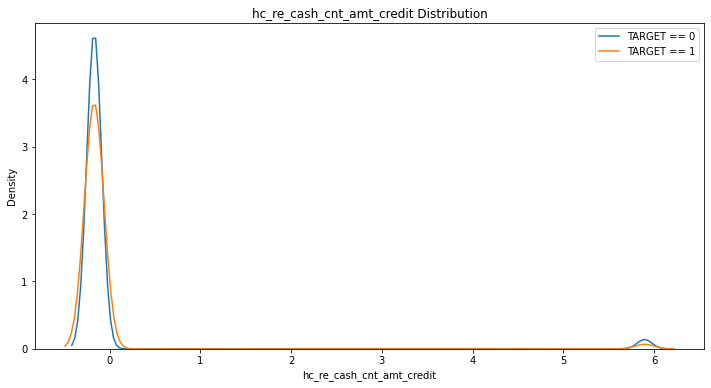

In [336]:
kde_target('hc_re_cash_cnt_amt_credit', app_train)

In [92]:
app_train['hc_re_cash_cnt_amt_credit'].isnull().sum()

0

### hc_re_cash_stddev_amt_credit

In [337]:
### Originから切り戻し
app_train['hc_re_cash_stddev_amt_credit'] = app_train_origin['hc_re_cash_stddev_amt_credit'].copy()
app_test['hc_re_cash_stddev_amt_credit'] = app_test_origin['hc_re_cash_stddev_amt_credit'].copy()
app_train['hc_re_cash_stddev_amt_credit'].isnull().sum()

298907

In [338]:
app_train['hc_re_cash_stddev_amt_credit'].value_counts()

0.000000         4906
29326.102972        1
332605.725630       1
10427.518113        1
19640.268905        1
                 ... 
22212.913494        1
75763.298108        1
66127.300703        1
384357.056236       1
116177.765964       1
Name: hc_re_cash_stddev_amt_credit, Length: 3699, dtype: int64

In [339]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_amt_credit
TARGET,1.00000,-0.00538
hc_re_cash_stddev_amt_credit,-0.00538,1.00000


In [340]:
### -999埋めで欠損値補完
app_train['hc_re_cash_stddev_amt_credit'] = app_train['hc_re_cash_stddev_amt_credit'].fillna(-999)
app_test['hc_re_cash_stddev_amt_credit'] = app_test['hc_re_cash_stddev_amt_credit'].fillna(-999)
app_train['hc_re_cash_stddev_amt_credit'].isnull().sum()

0

In [341]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_amt_credit
TARGET,1.000000,-0.008867
hc_re_cash_stddev_amt_credit,-0.008867,1.000000


In [342]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_stddev_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_stddev_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_stddev_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_stddev_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_stddev_amt_credit,-0.01756,1.00000


In [343]:
## 標準化
num_cols = ['hc_re_cash_stddev_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_stddev_amt_credit', 'TARGET']].corr()

,hc_re_cash_stddev_amt_credit,TARGET
hc_re_cash_stddev_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_stddev_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


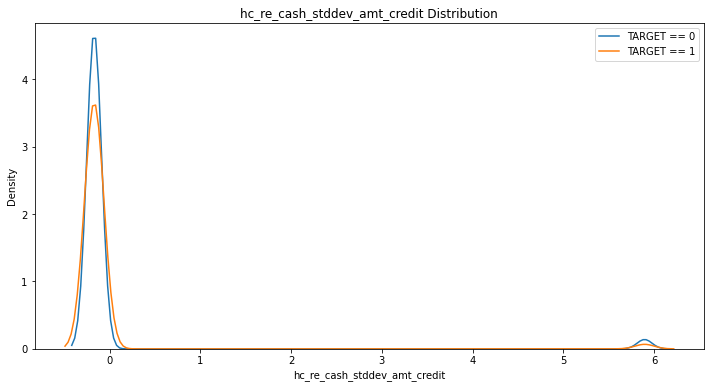

In [344]:
kde_target('hc_re_cash_stddev_amt_credit', app_train)

### hc_re_cash_stddev_pop_amt_credit

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_stddev_pop_amt_credit'] = app_train_origin['hc_re_cash_stddev_pop_amt_credit'].copy()
app_test['hc_re_cash_stddev_pop_amt_credit'] = app_test_origin['hc_re_cash_stddev_pop_amt_credit'].copy()
app_train['hc_re_cash_stddev_pop_amt_credit'].isnull().sum()

In [ ]:
app_train['hc_re_cash_stddev_pop_amt_credit'].value_counts()

In [96]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_credit
TARGET,1.000000,0.002863
hc_re_cash_stddev_pop_amt_credit,0.002863,1.000000


In [345]:
### -999埋めで欠損値補完
app_train['hc_re_cash_stddev_pop_amt_credit'] = app_train['hc_re_cash_stddev_pop_amt_credit'].fillna(-999)
app_test['hc_re_cash_stddev_pop_amt_credit'] = app_test['hc_re_cash_stddev_pop_amt_credit'].fillna(-999)
app_train['hc_re_cash_stddev_pop_amt_credit'].isnull().sum()

0

In [346]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_credit
TARGET,1.000000,-0.008867
hc_re_cash_stddev_pop_amt_credit,-0.008867,1.000000


In [347]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_stddev_pop_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_stddev_pop_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_stddev_pop_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_credit']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_stddev_pop_amt_credit,-0.01756,1.00000


In [348]:
## 標準化
num_cols = ['hc_re_cash_stddev_pop_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_stddev_pop_amt_credit', 'TARGET']].corr()

,hc_re_cash_stddev_pop_amt_credit,TARGET
hc_re_cash_stddev_pop_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_stddev_pop_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


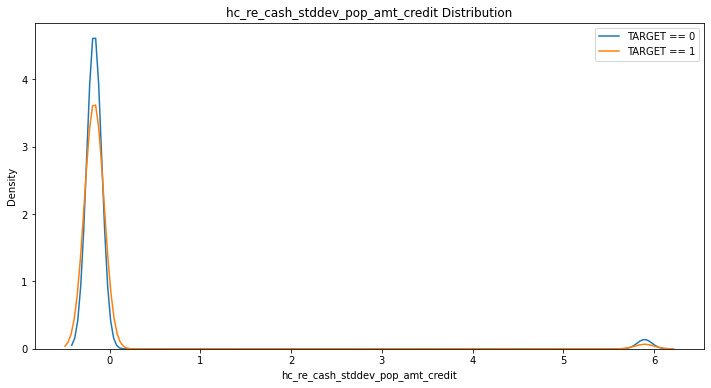

In [349]:
kde_target('hc_re_cash_stddev_pop_amt_credit', app_train)

### hc_re_cash_var_pop_amt_credit

In [350]:
### Originから切り戻し
app_train['hc_re_cash_var_pop_amt_credit'] = app_train_origin['hc_re_cash_var_pop_amt_credit'].copy()
app_test['hc_re_cash_var_pop_amt_credit'] = app_test_origin['hc_re_cash_var_pop_amt_credit'].copy()
app_train['hc_re_cash_var_pop_amt_credit'].isnull().sum()

298907

In [351]:
app_train['hc_re_cash_var_pop_amt_credit'].value_counts()

0.000000e+00    4906
8.600203e+08       1
1.106266e+11       1
1.087331e+08       1
3.857402e+08       1
                ... 
4.934135e+08       1
5.740077e+09       1
4.372820e+09       1
1.477303e+11       1
1.349727e+10       1
Name: hc_re_cash_var_pop_amt_credit, Length: 3699, dtype: int64

In [352]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_credit']].corr()

,TARGET,hc_re_cash_var_pop_amt_credit
TARGET,1.000000,-0.007245
hc_re_cash_var_pop_amt_credit,-0.007245,1.000000


In [353]:
### -999埋めで欠損値補完
app_train['hc_re_cash_var_pop_amt_credit'] = app_train['hc_re_cash_var_pop_amt_credit'].fillna(-999)
app_test['hc_re_cash_var_pop_amt_credit'] = app_test['hc_re_cash_var_pop_amt_credit'].fillna(-999)
app_train['hc_re_cash_var_pop_amt_credit'].isnull().sum()

0

In [354]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_credit']].corr()

,TARGET,hc_re_cash_var_pop_amt_credit
TARGET,1.000000,-0.006109
hc_re_cash_var_pop_amt_credit,-0.006109,1.000000


In [355]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_var_pop_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_var_pop_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_var_pop_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_var_pop_amt_credit']].corr()

,TARGET,hc_re_cash_var_pop_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_var_pop_amt_credit,-0.01756,1.00000


In [356]:
## 標準化
num_cols = ['hc_re_cash_var_pop_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_var_pop_amt_credit', 'TARGET']].corr()

,hc_re_cash_var_pop_amt_credit,TARGET
hc_re_cash_var_pop_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_var_pop_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


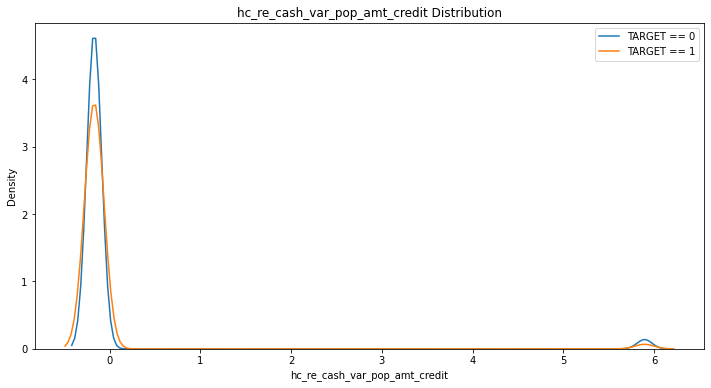

In [357]:
kde_target('hc_re_cash_var_pop_amt_credit', app_train)

### hc_re_cash_var_samp_amt_credit

In [358]:
### Originから切り戻し
app_train['hc_re_cash_var_samp_amt_credit'] = app_train_origin['hc_re_cash_var_samp_amt_credit'].copy()
app_test['hc_re_cash_var_samp_amt_credit'] = app_test_origin['hc_re_cash_var_samp_amt_credit'].copy()
app_train['hc_re_cash_var_samp_amt_credit'].isnull().sum()

298907

In [359]:
app_train['hc_re_cash_var_samp_amt_credit'].value_counts()

0.000000e+00    4906
8.667392e+08       1
1.113053e+11       1
1.089519e+08       1
3.868454e+08       1
                ... 
4.949899e+08       1
5.748313e+09       1
4.380320e+09       1
1.478482e+11       1
1.351574e+10       1
Name: hc_re_cash_var_samp_amt_credit, Length: 3699, dtype: int64

In [360]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_credit']].corr()

,TARGET,hc_re_cash_var_samp_amt_credit
TARGET,1.0000,-0.0071
hc_re_cash_var_samp_amt_credit,-0.0071,1.0000


In [361]:
### -999埋めで欠損値補完
app_train['hc_re_cash_var_samp_amt_credit'] = app_train['hc_re_cash_var_samp_amt_credit'].fillna(-999)
app_test['hc_re_cash_var_samp_amt_credit'] = app_test['hc_re_cash_var_samp_amt_credit'].fillna(-999)
app_train['hc_re_cash_var_samp_amt_credit'].isnull().sum()

0

In [362]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_credit']].corr()

,TARGET,hc_re_cash_var_samp_amt_credit
TARGET,1.000000,-0.006088
hc_re_cash_var_samp_amt_credit,-0.006088,1.000000


In [363]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_var_samp_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_var_samp_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_var_samp_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_var_samp_amt_credit']].corr()

,TARGET,hc_re_cash_var_samp_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_var_samp_amt_credit,-0.01756,1.00000


In [364]:
## 標準化
num_cols = ['hc_re_cash_var_samp_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_var_samp_amt_credit', 'TARGET']].corr()

,hc_re_cash_var_samp_amt_credit,TARGET
hc_re_cash_var_samp_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_var_samp_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


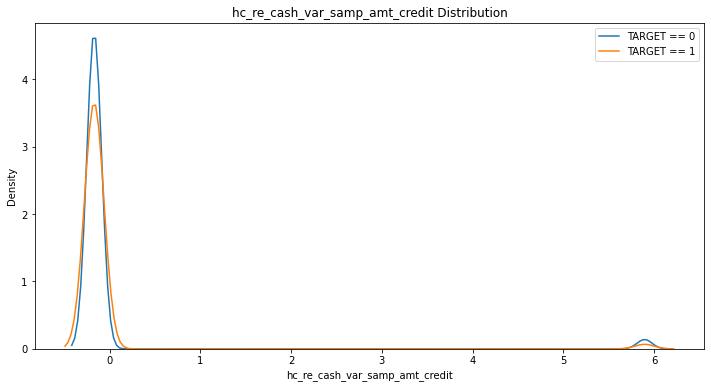

In [365]:
kde_target('hc_re_cash_var_samp_amt_credit', app_train)

### hc_re_cash_variance_samp_amt_credit

In [366]:
### Originから切り戻し
app_train['hc_re_cash_variance_samp_amt_credit'] = app_train_origin['hc_re_cash_variance_samp_amt_credit'].copy()
app_test['hc_re_cash_variance_samp_amt_credit'] = app_test_origin['hc_re_cash_variance_samp_amt_credit'].copy()
app_train['hc_re_cash_variance_samp_amt_credit'].isnull().sum()

298907

In [367]:
app_train['hc_re_cash_variance_samp_amt_credit'].value_counts()

0.000000e+00    4906
8.600203e+08       1
1.106266e+11       1
1.087331e+08       1
3.857402e+08       1
                ... 
4.934135e+08       1
5.740077e+09       1
4.372820e+09       1
1.477303e+11       1
1.349727e+10       1
Name: hc_re_cash_variance_samp_amt_credit, Length: 3699, dtype: int64

In [368]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_credit']].corr()

,TARGET,hc_re_cash_variance_samp_amt_credit
TARGET,1.000000,-0.007245
hc_re_cash_variance_samp_amt_credit,-0.007245,1.000000


In [369]:
### -999埋めで欠損値補完
app_train['hc_re_cash_variance_samp_amt_credit'] = app_train['hc_re_cash_variance_samp_amt_credit'].fillna(-999)
app_test['hc_re_cash_variance_samp_amt_credit'] = app_test['hc_re_cash_variance_samp_amt_credit'].fillna(-999)
app_train['hc_re_cash_variance_samp_amt_credit'].isnull().sum()

0

In [370]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_credit']].corr()

,TARGET,hc_re_cash_variance_samp_amt_credit
TARGET,1.000000,-0.006109
hc_re_cash_variance_samp_amt_credit,-0.006109,1.000000


In [371]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_variance_samp_amt_credit']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_variance_samp_amt_credit'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_variance_samp_amt_credit'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_credit']].corr()

,TARGET,hc_re_cash_variance_samp_amt_credit
TARGET,1.00000,-0.01756
hc_re_cash_variance_samp_amt_credit,-0.01756,1.00000


In [372]:
## 標準化
num_cols = ['hc_re_cash_variance_samp_amt_credit']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_variance_samp_amt_credit', 'TARGET']].corr()

,hc_re_cash_variance_samp_amt_credit,TARGET
hc_re_cash_variance_samp_amt_credit,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_variance_samp_amt_credit and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


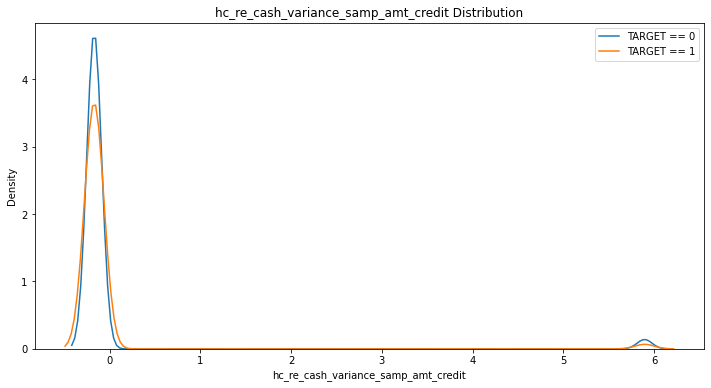

In [373]:
kde_target('hc_re_cash_variance_samp_amt_credit', app_train)

In [374]:
app_train['hc_re_cash_variance_samp_amt_credit'].isnull().sum()

0

### hc_re_cash_max_amt_down_payment

In [377]:
### Originから切り戻し
app_train['hc_re_cash_max_amt_down_payment'] = app_train_origin['hc_re_cash_max_amt_down_payment'].copy()
app_test['hc_re_cash_max_amt_down_payment'] = app_test_origin['hc_re_cash_max_amt_down_payment'].copy()
app_train['hc_re_cash_max_amt_down_payment'].isnull().sum()

298907

In [378]:
#app_train[['TARGET', 'hc_re_cash_max_amt_down_payment']].corr()

In [379]:
#kde_target('hc_re_cash_max_amt_down_payment', app_train)

In [380]:
#app_train['hc_re_cash_max_amt_down_payment'].isnull().sum()

In [381]:
columns = ['hc_re_cash_max_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_amt_down_payment

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_min_amt_down_payment'] = app_train_origin['hc_re_cash_min_amt_down_payment'].copy()
app_test['hc_re_cash_min_amt_down_payment'] = app_test_origin['hc_re_cash_min_amt_down_payment'].copy()
app_train['hc_re_cash_min_amt_down_payment'].isnull().sum()

In [376]:
app_train[['TARGET', 'hc_re_cash_min_amt_down_payment']].corr()

,TARGET,hc_re_cash_min_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_min_amt_down_payment,NaN,NaN


In [113]:
#kde_target('hc_re_cash_min_amt_down_payment', app_train)

In [114]:
app_train['hc_re_cash_min_amt_down_payment'].isnull().sum()

0

In [115]:
columns = ['hc_re_cash_min_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_amt_down_payment

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_sum_amt_down_payment'] = app_train_origin['hc_re_cash_sum_amt_down_payment'].copy()
app_test['hc_re_cash_sum_amt_down_payment'] = app_test_origin['hc_re_cash_sum_amt_down_payment'].copy()
app_train['hc_re_cash_sum_amt_down_payment'].isnull().sum()

In [116]:
app_train[['TARGET', 'hc_re_cash_sum_amt_down_payment']].corr()

,TARGET,hc_re_cash_sum_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_sum_amt_down_payment,NaN,NaN


In [117]:
#kde_target('hc_re_cash_sum_amt_down_payment', app_train)

In [118]:
app_train['hc_re_cash_sum_amt_down_payment'].isnull().sum()

0

In [119]:
columns = ['hc_re_cash_sum_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_amt_down_payment

In [120]:
app_train[['TARGET', 'hc_re_cash_avg_amt_down_payment']].corr()

,TARGET,hc_re_cash_avg_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_avg_amt_down_payment,NaN,NaN


In [121]:
#kde_target('hc_re_cash_avg_amt_down_payment', app_train)

In [122]:
app_train['hc_re_cash_avg_amt_down_payment'].isnull().sum()

0

In [123]:
columns = ['hc_re_cash_avg_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_amt_down_payment

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_cnt_amt_down_payment'] = app_train_origin['hc_re_cash_cnt_amt_down_payment'].copy()
app_test['hc_re_cash_cnt_amt_down_payment'] = app_test_origin['hc_re_cash_cnt_amt_down_payment'].copy()
app_train['hc_re_cash_cnt_amt_down_payment'].isnull().sum()

In [124]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_down_payment']].corr()

,TARGET,hc_re_cash_cnt_amt_down_payment
TARGET,1.000000,0.002878
hc_re_cash_cnt_amt_down_payment,0.002878,1.000000


In [125]:
#kde_target('hc_re_cash_cnt_amt_down_payment', app_train)

In [126]:
app_train['hc_re_cash_cnt_amt_down_payment'].isnull().sum()

0

In [127]:
columns = ['hc_re_cash_cnt_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_amt_down_payment

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_stddev_amt_down_payment'] = app_train_origin['hc_re_cash_stddev_amt_down_payment'].copy()
app_test['hc_re_cash_stddev_amt_down_payment'] = app_test_origin['hc_re_cash_stddev_amt_down_payment'].copy()
app_train['hc_re_cash_stddev_amt_down_payment'].isnull().sum()

In [128]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_down_payment']].corr()

,TARGET,hc_re_cash_stddev_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_amt_down_payment,NaN,NaN


In [129]:
#kde_target('hc_re_cash_stddev_amt_down_payment', app_train)

In [130]:
app_train['hc_re_cash_stddev_amt_down_payment'].isnull().sum()

0

In [131]:
columns = ['hc_re_cash_stddev_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_amt_down_payment

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_stddev_pop_amt_down_payment'] = app_train_origin['hc_re_cash_stddev_pop_amt_down_payment'].copy()
app_test['hc_re_cash_stddev_pop_amt_down_payment'] = app_test_origin['hc_re_cash_stddev_pop_amt_down_payment'].copy()
app_train['hc_re_cash_stddev_pop_amt_down_payment'].isnull().sum()

In [132]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_down_payment']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_pop_amt_down_payment,NaN,NaN


In [133]:
#kde_target('hc_re_cash_stddev_pop_amt_down_payment', app_train)

In [134]:
app_train['hc_re_cash_stddev_pop_amt_down_payment'].isnull().sum()

0

In [135]:
columns = ['hc_re_cash_stddev_pop_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_amt_down_payment

In [382]:
### Originから切り戻し
app_train['hc_re_cash_var_pop_amt_down_payment'] = app_train_origin['hc_re_cash_var_pop_amt_down_payment'].copy()
app_test['hc_re_cash_var_pop_amt_down_payment'] = app_test_origin['hc_re_cash_var_pop_amt_down_payment'].copy()
app_train['hc_re_cash_var_pop_amt_down_payment'].isnull().sum()

298907

In [383]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_down_payment']].corr()

,TARGET,hc_re_cash_var_pop_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_var_pop_amt_down_payment,NaN,NaN


In [384]:
#kde_target('hc_re_cash_var_pop_amt_down_payment', app_train)

In [385]:
app_train['hc_re_cash_var_pop_amt_down_payment'].isnull().sum()

298907

In [139]:
columns = ['hc_re_cash_var_pop_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_amt_down_payment

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_var_samp_amt_down_payment'] = app_train_origin['hc_re_cash_var_samp_amt_down_payment'].copy()
app_test['hc_re_cash_var_samp_amt_down_payment'] = app_test_origin['hc_re_cash_var_samp_amt_down_payment'].copy()
app_train['hc_re_cash_var_samp_amt_down_payment'].isnull().sum()

In [140]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_down_payment']].corr()

,TARGET,hc_re_cash_var_samp_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_var_samp_amt_down_payment,NaN,NaN


In [141]:
#kde_target('hc_re_cash_var_samp_amt_down_payment', app_train)

In [142]:
app_train['hc_re_cash_var_samp_amt_down_payment'].isnull().sum()

0

In [143]:
columns = ['hc_re_cash_var_samp_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_amt_down_payment

In [ ]:
### Originから切り戻し
app_train['hc_re_cash_variance_samp_amt_down_payment'] = app_train_origin['hc_re_cash_variance_samp_amt_down_payment'].copy()
app_test['hc_re_cash_variance_samp_amt_down_payment'] = app_test_origin['hc_re_cash_variance_samp_amt_down_payment'].copy()
app_train['hc_re_cash_variance_samp_amt_down_payment'].isnull().sum()

### 

In [144]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_down_payment']].corr()

,TARGET,hc_re_cash_variance_samp_amt_down_payment
TARGET,1.0,NaN
hc_re_cash_variance_samp_amt_down_payment,NaN,NaN


In [145]:
#kde_target('hc_re_cash_variance_samp_amt_down_payment', app_train)

In [146]:
app_train['hc_re_cash_variance_samp_amt_down_payment'].isnull().sum()

0

In [147]:
columns = ['hc_re_cash_variance_samp_amt_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_amt_goods_price

In [391]:
### Originから切り戻し
app_train['hc_re_cash_max_amt_goods_price'] = app_train_origin['hc_re_cash_max_amt_goods_price'].copy()
app_test['hc_re_cash_max_amt_goods_price'] = app_test_origin['hc_re_cash_max_amt_goods_price'].copy()
app_train['hc_re_cash_max_amt_goods_price'].isnull().sum()

298907

In [392]:
app_train['hc_re_cash_max_amt_goods_price'].value_counts()

450000.0     646
135000.0     495
225000.0     474
675000.0     437
90000.0      374
            ... 
1399500.0      1
859500.0       1
2074500.0      1
1071000.0      1
976500.0       1
Name: hc_re_cash_max_amt_goods_price, Length: 345, dtype: int64

In [393]:
app_train[['TARGET', 'hc_re_cash_max_amt_goods_price']].corr()

,TARGET,hc_re_cash_max_amt_goods_price
TARGET,1.000000,-0.029012
hc_re_cash_max_amt_goods_price,-0.029012,1.000000


In [394]:
### -999埋めで欠損値補完
app_train['hc_re_cash_max_amt_goods_price'] = app_train['hc_re_cash_max_amt_goods_price'].fillna(-999)
app_test['hc_re_cash_max_amt_goods_price'] = app_test['hc_re_cash_max_amt_goods_price'].fillna(-999)
app_train['hc_re_cash_max_amt_goods_price'].isnull().sum()

0

In [395]:
app_train[['TARGET', 'hc_re_cash_max_amt_goods_price']].corr()

,TARGET,hc_re_cash_max_amt_goods_price
TARGET,1.000000,-0.016025
hc_re_cash_max_amt_goods_price,-0.016025,1.000000


In [396]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_max_amt_goods_price']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_max_amt_goods_price'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_max_amt_goods_price'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_max_amt_goods_price']].corr()

,TARGET,hc_re_cash_max_amt_goods_price
TARGET,1.00000,-0.01756
hc_re_cash_max_amt_goods_price,-0.01756,1.00000


In [397]:
## 標準化
num_cols = ['hc_re_cash_max_amt_goods_price']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_max_amt_goods_price', 'TARGET']].corr()

,hc_re_cash_max_amt_goods_price,TARGET
hc_re_cash_max_amt_goods_price,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_max_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


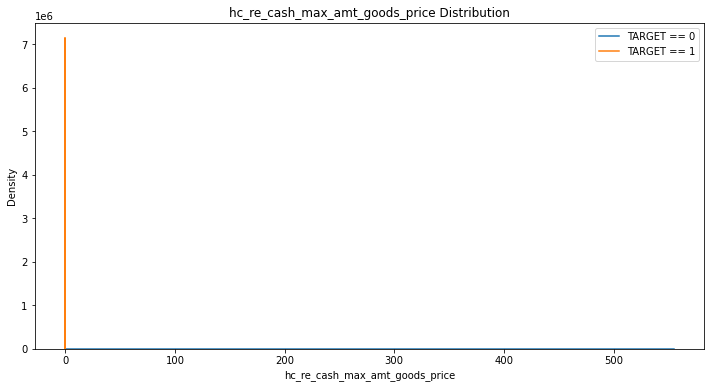

In [149]:
kde_target('hc_re_cash_max_amt_goods_price', app_train)

### hc_re_cash_min_amt_goods_price

In [398]:
### Originから切り戻し
app_train['hc_re_cash_min_amt_goods_price'] = app_train_origin['hc_re_cash_min_amt_goods_price'].copy()
app_test['hc_re_cash_min_amt_goods_price'] = app_test_origin['hc_re_cash_min_amt_goods_price'].copy()
app_train['hc_re_cash_min_amt_goods_price'].isnull().sum()

298907

In [406]:
app_train['hc_re_cash_min_amt_goods_price'].value_counts()

-0.169661    298907
 5.894033       777
 5.893899       701
 5.893981       671
 5.894102       552
              ...  
 5.894387         1
 5.894341         1
 5.894330         1
 5.894261         1
 5.894329         1
Name: hc_re_cash_min_amt_goods_price, Length: 270, dtype: int64

In [399]:
app_train[['TARGET', 'hc_re_cash_min_amt_goods_price']].corr()

,TARGET,hc_re_cash_min_amt_goods_price
TARGET,1.000000,-0.026454
hc_re_cash_min_amt_goods_price,-0.026454,1.000000


In [400]:
### -999埋めで欠損値補完
app_train['hc_re_cash_min_amt_goods_price'] = app_train['hc_re_cash_min_amt_goods_price'].fillna(-999)
app_test['hc_re_cash_min_amt_goods_price'] = app_test['hc_re_cash_min_amt_goods_price'].fillna(-999)
app_train['hc_re_cash_min_amt_goods_price'].isnull().sum()

0

In [401]:
app_train[['TARGET', 'hc_re_cash_min_amt_goods_price']].corr()

,TARGET,hc_re_cash_min_amt_goods_price
TARGET,1.000000,-0.014818
hc_re_cash_min_amt_goods_price,-0.014818,1.000000


In [402]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_min_amt_goods_price']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_min_amt_goods_price'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_min_amt_goods_price'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_min_amt_goods_price']].corr()

,TARGET,hc_re_cash_min_amt_goods_price
TARGET,1.00000,-0.01756
hc_re_cash_min_amt_goods_price,-0.01756,1.00000


In [403]:
## 標準化
num_cols = ['hc_re_cash_min_amt_goods_price']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_min_amt_goods_price', 'TARGET']].corr()

,hc_re_cash_min_amt_goods_price,TARGET
hc_re_cash_min_amt_goods_price,1.00000,-0.01756
TARGET,-0.01756,1.00000


The correlation between hc_re_cash_min_amt_goods_price and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


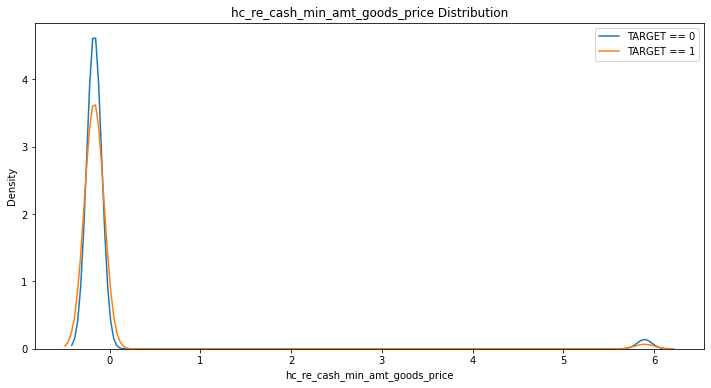

In [404]:
kde_target('hc_re_cash_min_amt_goods_price', app_train)

In [405]:
app_train['hc_re_cash_min_amt_goods_price'].isnull().sum()

0

### hc_re_cash_sum_amt_goods_price

In [421]:
### Originから切り戻し
app_train['hc_re_cash_sum_amt_goods_price'] = app_train_origin['hc_re_cash_sum_amt_goods_price'].copy()
app_test['hc_re_cash_sum_amt_goods_price'] = app_test_origin['hc_re_cash_sum_amt_goods_price'].copy()
app_train['hc_re_cash_sum_amt_goods_price'].isnull().sum()

298907

In [422]:
app_train['hc_re_cash_sum_amt_goods_price'].value_counts()

2700000.0      47
4050000.0      43
16200000.0     41
1890000.0      39
5400000.0      37
               ..
29565000.0      1
731250000.0     1
136516500.0     1
338850000.0     1
460215000.0     1
Name: hc_re_cash_sum_amt_goods_price, Length: 4832, dtype: int64

In [423]:
app_train[['TARGET', 'hc_re_cash_sum_amt_goods_price']].corr()

,TARGET,hc_re_cash_sum_amt_goods_price
TARGET,1.000000,-0.020034
hc_re_cash_sum_amt_goods_price,-0.020034,1.000000


In [424]:
### -999埋めで欠損値補完
app_train['hc_re_cash_sum_amt_goods_price'] = app_train['hc_re_cash_sum_amt_goods_price'].fillna(-999)
app_test['hc_re_cash_sum_amt_goods_price'] = app_test['hc_re_cash_sum_amt_goods_price'].fillna(-999)
app_train['hc_re_cash_sum_amt_goods_price'].isnull().sum()

0

In [425]:
app_train[['TARGET', 'hc_re_cash_sum_amt_goods_price']].corr()

,TARGET,hc_re_cash_sum_amt_goods_price
TARGET,1.000000,-0.011026
hc_re_cash_sum_amt_goods_price,-0.011026,1.000000


In [426]:
## Yao-Johnson変換
num_cols = ['hc_re_cash_sum_amt_goods_price']
### 学習データに基づいてYao-Johnson変換を定義
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(app_train[num_cols].copy())

### 変換後のデータで各列を置換
app_train['hc_re_cash_sum_amt_goods_price'] = pt.transform(app_train[num_cols])
app_test['hc_re_cash_sum_amt_goods_price'] = pt.transform(app_test[num_cols])

## Yao-Johnson変換後の目的変数との相関
app_train[['TARGET', 'hc_re_cash_sum_amt_goods_price']].corr()

,TARGET,hc_re_cash_sum_amt_goods_price
TARGET,1.000000,-0.017568
hc_re_cash_sum_amt_goods_price,-0.017568,1.000000


In [427]:
## 標準化
num_cols = ['hc_re_cash_sum_amt_goods_price']
scaler = StandardScaler()
scaler.fit(app_train[num_cols])

app_train[num_cols] = scaler.transform(app_train[num_cols])
app_test[num_cols] = scaler.transform(app_test[num_cols])
app_train[['hc_re_cash_sum_amt_goods_price', 'TARGET']].corr()

,hc_re_cash_sum_amt_goods_price,TARGET
hc_re_cash_sum_amt_goods_price,1.000000,-0.017568
TARGET,-0.017568,1.000000


The correlation between hc_re_cash_sum_amt_goods_price and the TARGET is -0.0176
Median value for loan that was not repaid = -0.1697
Median value for loan that was repaid =     -0.1697


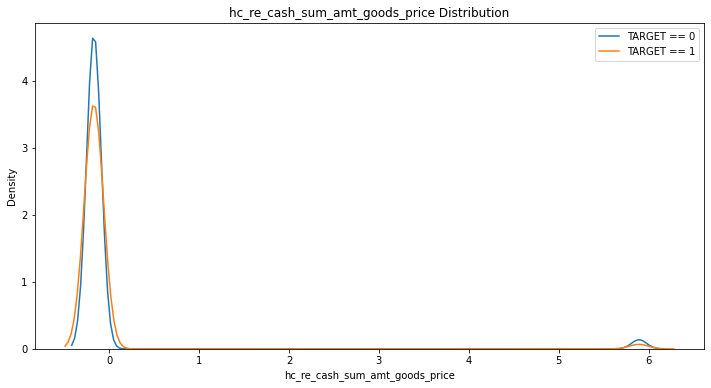

In [414]:
kde_target('hc_re_cash_sum_amt_goods_price', app_train)

### hc_re_cash_avg_amt_goods_price

In [157]:
app_train[['TARGET', 'hc_re_cash_avg_amt_goods_price']].corr()

,TARGET,hc_re_cash_avg_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_avg_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_avg_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


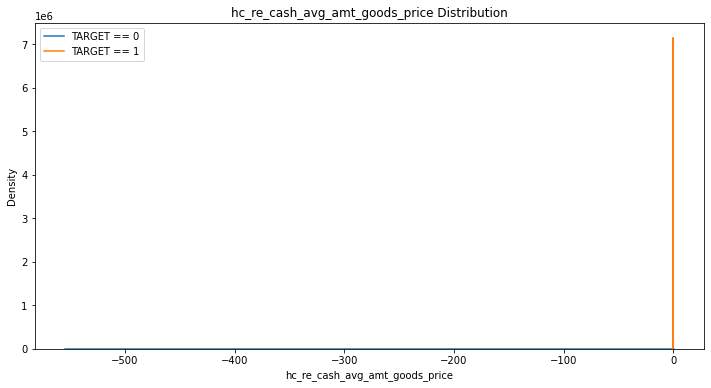

In [158]:
kde_target('hc_re_cash_avg_amt_goods_price', app_train)

In [159]:
app_train['hc_re_cash_avg_amt_goods_price'].isnull().sum()

0

### hc_re_cash_sum_amt_goods_price

In [160]:
app_train[['TARGET', 'hc_re_cash_sum_amt_goods_price']].corr()

,TARGET,hc_re_cash_sum_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_sum_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_sum_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


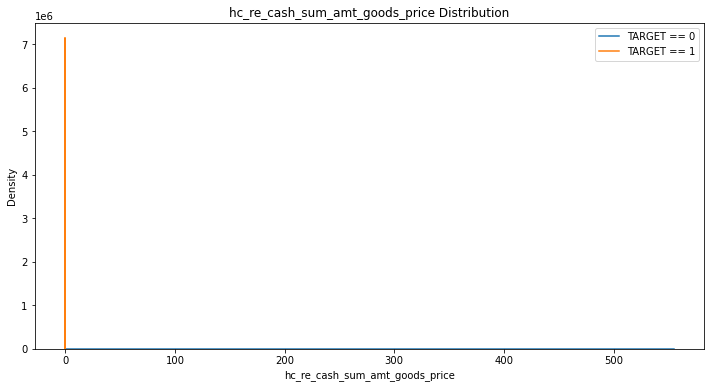

In [161]:
kde_target('hc_re_cash_sum_amt_goods_price', app_train)

In [162]:
app_train['hc_re_cash_sum_amt_goods_price'].isnull().sum()

0

### hc_re_cash_cnt_amt_goods_price

In [163]:
app_train[['TARGET', 'hc_re_cash_cnt_amt_goods_price']].corr()

,TARGET,hc_re_cash_cnt_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_cnt_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_cnt_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


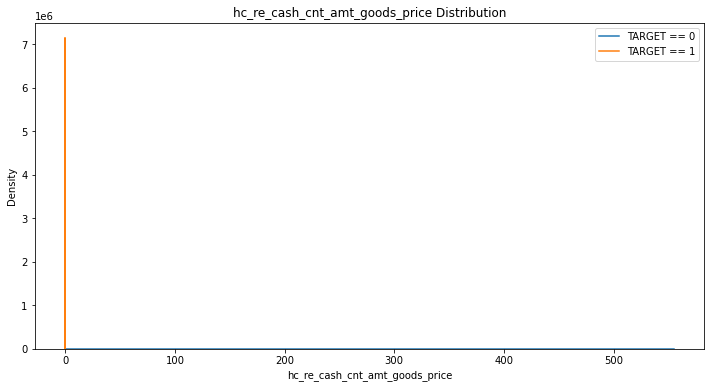

In [164]:
kde_target('hc_re_cash_cnt_amt_goods_price', app_train)

In [165]:
app_train['hc_re_cash_cnt_amt_goods_price'].isnull().sum()

0

### hc_re_cash_stddev_amt_goods_price

In [166]:
app_train[['TARGET', 'hc_re_cash_stddev_amt_goods_price']].corr()

,TARGET,hc_re_cash_stddev_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_stddev_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_stddev_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


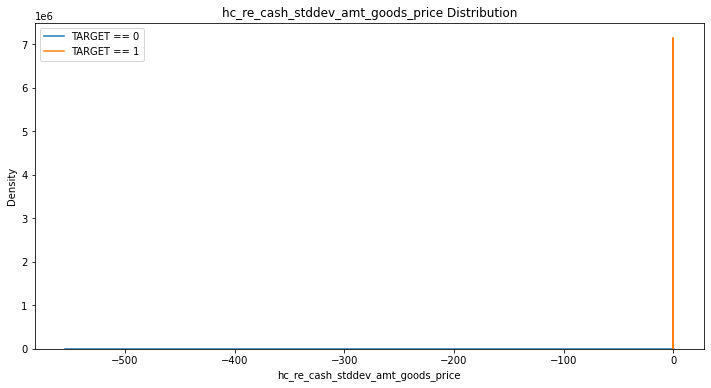

In [167]:
kde_target('hc_re_cash_stddev_amt_goods_price', app_train)

In [168]:
app_train['hc_re_cash_stddev_amt_goods_price'].isnull().sum()

0

### hc_re_cash_stddev_pop_amt_goods_price

In [169]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_amt_goods_price']].corr()

,TARGET,hc_re_cash_stddev_pop_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_stddev_pop_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_stddev_pop_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


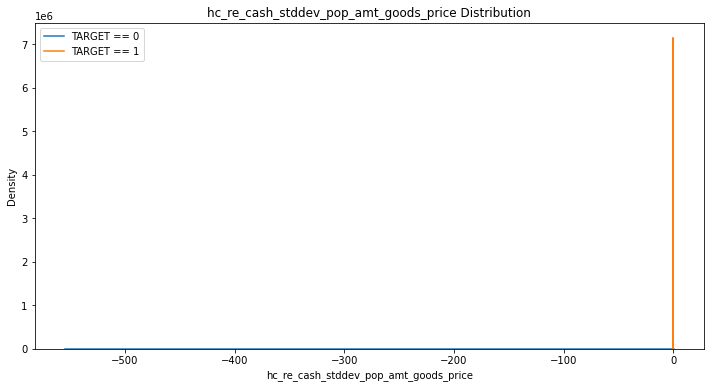

In [170]:
kde_target('hc_re_cash_stddev_pop_amt_goods_price', app_train)

In [171]:
app_train['hc_re_cash_stddev_pop_amt_goods_price'].isnull().sum()

0

### hc_re_cash_var_pop_amt_goods_price

In [172]:
app_train[['TARGET', 'hc_re_cash_var_pop_amt_goods_price']].corr()

,TARGET,hc_re_cash_var_pop_amt_goods_price
TARGET,1.000000,-0.000534
hc_re_cash_var_pop_amt_goods_price,-0.000534,1.000000


The correlation between hc_re_cash_var_pop_amt_goods_price and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


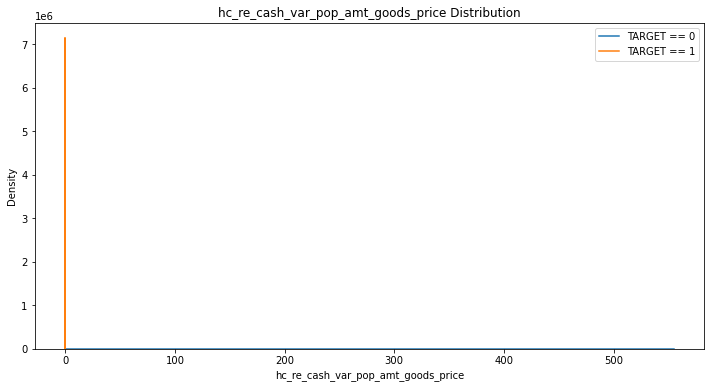

In [173]:
kde_target('hc_re_cash_var_pop_amt_goods_price', app_train)

In [174]:
app_train['hc_re_cash_var_pop_amt_goods_price'].isnull().sum()

0

### hc_re_cash_var_samp_amt_goods_price

In [175]:
app_train[['TARGET', 'hc_re_cash_var_samp_amt_goods_price']].corr()

,TARGET,hc_re_cash_var_samp_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_var_samp_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_var_samp_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


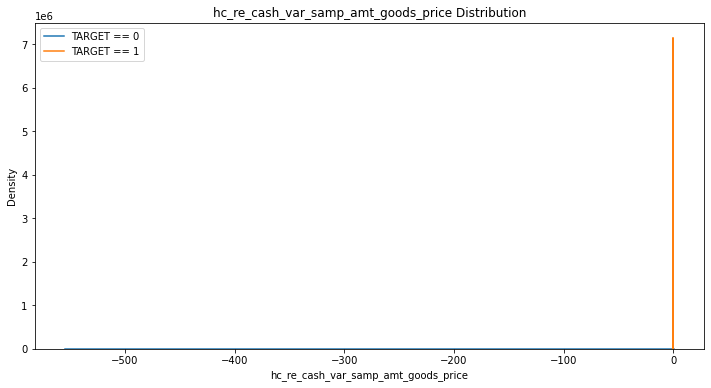

In [176]:
kde_target('hc_re_cash_var_samp_amt_goods_price', app_train)

In [177]:
app_train['hc_re_cash_var_samp_amt_goods_price'].isnull().sum()

0

### hc_re_cash_variance_samp_amt_goods_price

In [178]:
app_train[['TARGET', 'hc_re_cash_variance_samp_amt_goods_price']].corr()

,TARGET,hc_re_cash_variance_samp_amt_goods_price
TARGET,1.000000,0.000534
hc_re_cash_variance_samp_amt_goods_price,0.000534,1.000000


The correlation between hc_re_cash_variance_samp_amt_goods_price and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


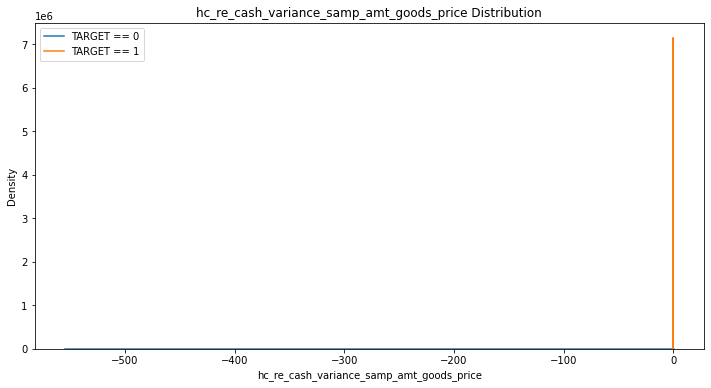

In [179]:
kde_target('hc_re_cash_variance_samp_amt_goods_price', app_train)

In [180]:
app_train['hc_re_cash_variance_samp_amt_goods_price'].isnull().sum()

0

### hc_re_cash_max_rate_down_payment

In [181]:
app_train['hc_re_cash_max_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_max_rate_down_payment, dtype: int64

In [182]:
app_train[['TARGET', 'hc_re_cash_max_rate_down_payment']].corr()

,TARGET,hc_re_cash_max_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_max_rate_down_payment,NaN,NaN


In [183]:
#kde_target('hc_re_cash_max_rate_down_payment', app_train)

In [184]:
app_train['hc_re_cash_max_rate_down_payment'].isnull().sum()

0

In [185]:
columns = ['hc_re_cash_max_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_rate_down_payment

In [186]:
app_train['hc_re_cash_min_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_min_rate_down_payment, dtype: int64

In [187]:
#kde_target('hc_re_cash_min_rate_down_payment', app_train)

In [188]:
app_train['hc_re_cash_min_rate_down_payment'].isnull().sum()

0

In [189]:
columns = ['hc_re_cash_min_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_rate_down_payment

In [190]:
app_train['hc_re_cash_sum_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_sum_rate_down_payment, dtype: int64

In [191]:
#kde_target('hc_re_cash_sum_rate_down_payment', app_train)

In [192]:
app_train['hc_re_cash_sum_rate_down_payment'].isnull().sum()

0

In [193]:
columns = ['hc_re_cash_sum_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_rate_down_payment

In [194]:
app_train['hc_re_cash_avg_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_avg_rate_down_payment, dtype: int64

In [195]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_interest_primary']].corr()

,TARGET,hc_re_cash_cnt_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_cnt_rate_interest_primary,NaN,NaN


In [196]:
#kde_target('hc_re_cash_avg_rate_down_payment', app_train)

In [197]:
app_train['hc_re_cash_avg_rate_down_payment'].isnull().sum()

0

In [198]:
columns = ['hc_re_cash_avg_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_rate_down_payment

In [199]:
app_train['hc_re_cash_cnt_rate_down_payment'].value_counts()

0.001803    8136
0.001803       3
0.001803       3
0.001803       3
0.001803       3
            ... 
0.001803       1
0.001803       1
0.001803       1
0.001803       1
0.001803       1
Name: hc_re_cash_cnt_rate_down_payment, Length: 297871, dtype: int64

In [200]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_down_payment']].corr()

,TARGET,hc_re_cash_cnt_rate_down_payment
TARGET,1.000000,0.000534
hc_re_cash_cnt_rate_down_payment,0.000534,1.000000


In [201]:
#kde_target('hc_re_cash_cnt_rate_down_payment', app_train)

In [202]:
app_train['hc_re_cash_cnt_rate_down_payment'].isnull().sum()

0

In [203]:
columns = ['hc_re_cash_cnt_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_rate_down_payment

In [204]:
app_train['hc_re_cash_stddev_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_stddev_rate_down_payment, dtype: int64

In [205]:
app_train[['TARGET', 'hc_re_cash_stddev_rate_down_payment']].corr()

,TARGET,hc_re_cash_stddev_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_rate_down_payment,NaN,NaN


In [206]:
#kde_target('hc_re_cash_stddev_rate_down_payment', app_train)

In [207]:
app_train['hc_re_cash_stddev_rate_down_payment'].isnull().sum()

0

In [208]:
columns = ['hc_re_cash_stddev_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_rate_down_payment

In [209]:
app_train['hc_re_cash_stddev_pop_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_stddev_pop_rate_down_payment, dtype: int64

In [210]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_rate_down_payment']].corr()

,TARGET,hc_re_cash_stddev_pop_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_stddev_pop_rate_down_payment,NaN,NaN


In [211]:
#kde_target('hc_re_cash_stddev_pop_rate_down_payment', app_train)

In [212]:
app_train['hc_re_cash_stddev_pop_rate_down_payment'].isnull().sum()

0

In [213]:
columns = ['hc_re_cash_stddev_pop_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_rate_down_payment

In [214]:
app_train['hc_re_cash_var_pop_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_var_pop_rate_down_payment, dtype: int64

In [215]:
app_train[['TARGET', 'hc_re_cash_var_pop_rate_down_payment']].corr()

,TARGET,hc_re_cash_var_pop_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_var_pop_rate_down_payment,NaN,NaN


In [216]:
#kde_target('hc_re_cash_var_pop_rate_down_payment', app_train)

In [217]:
app_train['hc_re_cash_var_pop_rate_down_payment'].isnull().sum()

0

In [218]:
columns = ['hc_re_cash_var_pop_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_rate_down_payment

In [219]:
app_train['hc_re_cash_var_samp_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_var_samp_rate_down_payment, dtype: int64

In [220]:
app_train[['TARGET', 'hc_re_cash_var_samp_rate_down_payment']].corr()

,TARGET,hc_re_cash_var_samp_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_var_samp_rate_down_payment,NaN,NaN


In [221]:
#kde_target('hc_re_cash_var_samp_rate_down_payment', app_train)

In [222]:
app_train['hc_re_cash_var_samp_rate_down_payment'].isnull().sum()

0

In [223]:
columns = ['hc_re_cash_var_samp_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_rate_down_payment

In [224]:
app_train['hc_re_cash_variance_samp_rate_down_payment'].value_counts()

0.0    307511
Name: hc_re_cash_variance_samp_rate_down_payment, dtype: int64

In [225]:
app_train[['TARGET', 'hc_re_cash_variance_samp_rate_down_payment']].corr()

,TARGET,hc_re_cash_variance_samp_rate_down_payment
TARGET,1.0,NaN
hc_re_cash_variance_samp_rate_down_payment,NaN,NaN


In [226]:
#kde_target('hc_re_cash_variance_samp_rate_down_payment', app_train)

In [227]:
app_train['hc_re_cash_variance_samp_rate_down_payment'].isnull().sum()

0

In [228]:
columns = ['hc_re_cash_variance_samp_rate_down_payment']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_rate_interest_primary

In [229]:
#app_train['hc_re_cash_max_rate_interest_primary'].value_counts()

In [230]:
app_train[['TARGET', 'hc_re_cash_max_rate_interest_primary']].corr()

,TARGET,hc_re_cash_max_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_max_rate_interest_primary,NaN,NaN


In [231]:
#kde_target('hc_re_cash_max_rate_interest_primary', app_train)

In [232]:
app_train['hc_re_cash_max_rate_interest_primary'].isnull().sum()

0

In [233]:
columns = ['hc_re_cash_max_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_rate_interest_primary

In [234]:
#app_train['hc_re_cash_min_rate_interest_primary'].value_counts()

In [235]:
app_train[['TARGET', 'hc_re_cash_min_rate_interest_primary']].corr()

,TARGET,hc_re_cash_min_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_min_rate_interest_primary,NaN,NaN


In [236]:
#kde_target('hc_re_cash_min_rate_interest_primary', app_train)

In [237]:
app_train['hc_re_cash_min_rate_interest_primary'].isnull().sum()

0

In [238]:
columns = ['hc_re_cash_min_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_rate_interest_primary

In [239]:
#app_train['hc_re_cash_sum_rate_interest_primary'].value_counts()

In [240]:
app_train[['TARGET', 'hc_re_cash_sum_rate_interest_primary']].corr()

,TARGET,hc_re_cash_sum_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_sum_rate_interest_primary,NaN,NaN


In [241]:
#kde_target('hc_re_cash_sum_rate_interest_primary', app_train)

In [242]:
app_train['hc_re_cash_sum_rate_interest_primary'].isnull().sum()

0

In [243]:
columns = ['hc_re_cash_sum_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_rate_interest_primary

In [244]:
#app_train['hc_re_cash_avg_rate_interest_primary'].value_counts()

In [245]:
app_train[['TARGET', 'hc_re_cash_avg_rate_interest_primary']].corr()

,TARGET,hc_re_cash_avg_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_avg_rate_interest_primary,NaN,NaN


In [246]:
#kde_target('hc_re_cash_avg_rate_interest_primary', app_train)

In [247]:
app_train['hc_re_cash_avg_rate_interest_primary'].isnull().sum()

0

In [248]:
columns = ['hc_re_cash_avg_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_rate_interest_primary

In [249]:
#app_train['hc_re_cash_cnt_rate_interest_primary'].value_counts()

In [250]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_interest_primary']].corr()

,TARGET,hc_re_cash_cnt_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_cnt_rate_interest_primary,NaN,NaN


In [251]:
#kde_target('hc_re_cash_cnt_rate_interest_primary', app_train)

In [252]:
app_train['hc_re_cash_cnt_rate_interest_primary'].isnull().sum()

0

In [253]:
columns = ['hc_re_cash_cnt_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_rate_interest_primary

In [254]:
#app_train['hc_re_cash_stddev_rate_interest_primary'].value_counts()

In [255]:
app_train[['TARGET', 'hc_re_cash_stddev_rate_interest_primary']].corr()

,TARGET,hc_re_cash_stddev_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_stddev_rate_interest_primary,NaN,NaN


In [256]:
#kde_target('hc_re_cash_stddev_rate_interest_primary', app_train)

In [257]:
app_train['hc_re_cash_stddev_rate_interest_primary'].isnull().sum()

0

In [258]:
columns = ['hc_re_cash_stddev_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_rate_interest_primary

In [259]:
#app_train['hc_re_cash_stddev_pop_rate_interest_primary'].value_counts()

In [260]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_rate_interest_primary']].corr()

,TARGET,hc_re_cash_stddev_pop_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_stddev_pop_rate_interest_primary,NaN,NaN


In [261]:
#kde_target('hc_re_cash_stddev_pop_rate_interest_primary', app_train)

In [262]:
app_train['hc_re_cash_stddev_pop_rate_interest_primary'].isnull().sum()

0

In [263]:
columns = ['hc_re_cash_stddev_pop_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_rate_interest_primary

In [264]:
#app_train['hc_re_cash_var_pop_rate_interest_primary'].value_counts()

In [265]:
app_train[['TARGET', 'hc_re_cash_var_pop_rate_interest_primary']].corr()

,TARGET,hc_re_cash_var_pop_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_var_pop_rate_interest_primary,NaN,NaN


In [266]:
#kde_target('hc_re_cash_var_pop_rate_interest_primary', app_train)

In [267]:
app_train['hc_re_cash_var_pop_rate_interest_primary'].isnull().sum()

0

In [268]:
columns = ['hc_re_cash_var_pop_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_rate_interest_primary

In [269]:
#app_train['hc_re_cash_var_samp_rate_interest_primary'].value_counts()

In [270]:
app_train[['TARGET', 'hc_re_cash_var_samp_rate_interest_primary']].corr()

,TARGET,hc_re_cash_var_samp_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_var_samp_rate_interest_primary,NaN,NaN


In [271]:
#kde_target('hc_re_cash_var_samp_rate_interest_primary', app_train)

In [272]:
app_train['hc_re_cash_var_samp_rate_interest_primary'].isnull().sum()

0

In [273]:
columns = ['hc_re_cash_var_samp_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_rate_interest_primary

In [274]:
#app_train['hc_re_cash_variance_samp_rate_interest_primary'].value_counts()

In [275]:
app_train[['TARGET', 'hc_re_cash_variance_samp_rate_interest_primary']].corr()

,TARGET,hc_re_cash_variance_samp_rate_interest_primary
TARGET,1.0,NaN
hc_re_cash_variance_samp_rate_interest_primary,NaN,NaN


In [276]:
#kde_target('hc_re_cash_variance_samp_rate_interest_primary', app_train)

In [277]:
app_train['hc_re_cash_variance_samp_rate_interest_primary'].isnull().sum()

0

In [278]:
columns = ['hc_re_cash_variance_samp_rate_interest_primary']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_rate_interest_privileged

In [279]:
#app_train['hc_re_cash_max_rate_interest_privileged'].value_counts()

In [280]:
app_train[['TARGET', 'hc_re_cash_max_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_max_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_max_rate_interest_privileged,NaN,NaN


In [281]:
#kde_target('hc_re_cash_max_rate_interest_privileged', app_train)

In [282]:
app_train['hc_re_cash_max_rate_interest_privileged'].isnull().sum()

0

In [283]:
columns = ['hc_re_cash_max_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_min_rate_interest_privileged

In [284]:
#app_train['hc_re_cash_min_rate_interest_privileged'].value_counts()

In [285]:
app_train[['TARGET', 'hc_re_cash_min_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_min_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_min_rate_interest_privileged,NaN,NaN


In [286]:
#kde_target('hc_re_cash_min_rate_interest_privileged', app_train)

In [287]:
app_train['hc_re_cash_min_rate_interest_privileged'].isnull().sum()

0

In [288]:
columns = ['hc_re_cash_min_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_sum_rate_interest_privileged

In [289]:
#app_train['hc_re_cash_sum_rate_interest_privileged'].value_counts()

In [290]:
app_train[['TARGET', 'hc_re_cash_sum_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_sum_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_sum_rate_interest_privileged,NaN,NaN


In [291]:
#kde_target('hc_re_cash_sum_rate_interest_privileged', app_train)

In [292]:
app_train['hc_re_cash_sum_rate_interest_privileged'].isnull().sum()

0

In [293]:
columns = ['hc_re_cash_sum_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_avg_rate_interest_privileged

In [294]:
#app_train['hc_re_cash_avg_rate_interest_privileged'].value_counts()

In [295]:
app_train[['TARGET', 'hc_re_cash_avg_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_avg_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_avg_rate_interest_privileged,NaN,NaN


In [296]:
#kde_target('hc_re_cash_avg_rate_interest_privileged', app_train)

In [297]:
app_train['hc_re_cash_avg_rate_interest_privileged'].isnull().sum()

0

In [298]:
columns = ['hc_re_cash_avg_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_cnt_rate_interest_privileged

In [299]:
#app_train['hc_re_cash_cnt_rate_interest_privileged'].value_counts()

In [300]:
app_train[['TARGET', 'hc_re_cash_cnt_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_cnt_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_cnt_rate_interest_privileged,NaN,NaN


In [301]:
#kde_target('hc_re_cash_cnt_rate_interest_privileged', app_train)

In [302]:
app_train['hc_re_cash_cnt_rate_interest_privileged'].isnull().sum()

0

In [303]:
columns = ['hc_re_cash_cnt_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_rate_interest_privileged

In [304]:
#app_train['hc_re_cash_stddev_rate_interest_privileged'].value_counts()

In [305]:
app_train[['TARGET', 'hc_re_cash_stddev_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_stddev_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_stddev_rate_interest_privileged,NaN,NaN


In [306]:
#kde_target('hc_re_cash_stddev_rate_interest_privileged', app_train)

In [307]:
app_train['hc_re_cash_stddev_rate_interest_privileged'].isnull().sum()

0

In [308]:
columns = ['hc_re_cash_stddev_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_stddev_pop_rate_interest_privileged

In [309]:
#app_train['hc_re_cash_stddev_pop_rate_interest_privileged'].value_counts()

In [310]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_stddev_pop_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_stddev_pop_rate_interest_privileged,NaN,NaN


In [311]:
#kde_target('hc_re_cash_stddev_pop_rate_interest_privileged', app_train)

In [312]:
app_train['hc_re_cash_stddev_pop_rate_interest_privileged'].isnull().sum()

0

In [313]:
columns = ['hc_re_cash_stddev_pop_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_pop_rate_interest_privileged

In [314]:
#app_train['hc_re_cash_var_pop_rate_interest_privileged'].value_counts()

In [315]:
app_train[['TARGET', 'hc_re_cash_var_pop_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_var_pop_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_var_pop_rate_interest_privileged,NaN,NaN


In [316]:
#kde_target('hc_re_cash_var_pop_rate_interest_privileged', app_train)

In [317]:
app_train['hc_re_cash_var_pop_rate_interest_privileged'].isnull().sum()

0

In [318]:
columns = ['hc_re_cash_var_pop_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_var_samp_rate_interest_privileged

In [319]:
#app_train['hc_re_cash_var_samp_rate_interest_privileged'].value_counts()

In [320]:
app_train[['TARGET', 'hc_re_cash_var_samp_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_var_samp_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_var_samp_rate_interest_privileged,NaN,NaN


In [321]:
#kde_target('hc_re_cash_var_samp_rate_interest_privileged', app_train)

In [322]:
app_train['hc_re_cash_var_samp_rate_interest_privileged'].isnull().sum()

0

In [323]:
columns = ['hc_re_cash_var_samp_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_variance_samp_rate_interest_privileged

In [324]:
#app_train['hc_re_cash_variance_samp_rate_interest_privileged'].value_counts()

In [325]:
app_train[['TARGET', 'hc_re_cash_variance_samp_rate_interest_privileged']].corr()

,TARGET,hc_re_cash_variance_samp_rate_interest_privileged
TARGET,1.0,NaN
hc_re_cash_variance_samp_rate_interest_privileged,NaN,NaN


In [326]:
#kde_target('hc_re_cash_variance_samp_rate_interest_privileged', app_train)

In [327]:
app_train['hc_re_cash_variance_samp_rate_interest_privileged'].isnull().sum()

0

In [328]:
columns = ['hc_re_cash_variance_samp_rate_interest_privileged']
app_train.drop(columns, axis=1, inplace=True)
app_test.drop(columns, axis=1, inplace=True)

### hc_re_cash_max_sk_dpd

In [329]:
app_train[['TARGET', 'hc_re_cash_max_sk_dpd']].corr()

,TARGET,hc_re_cash_max_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_max_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_max_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


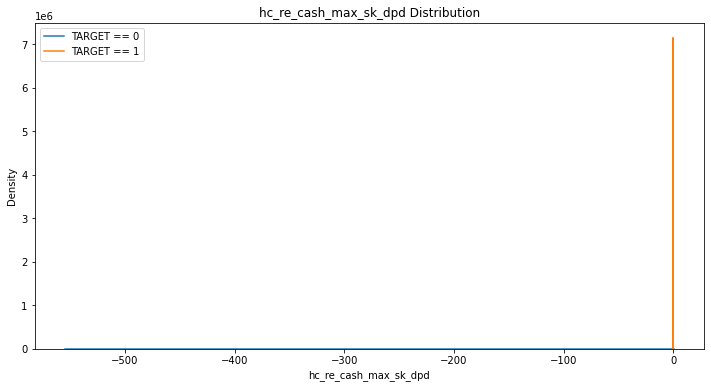

In [330]:
kde_target('hc_re_cash_max_sk_dpd', app_train)

In [331]:
app_train['hc_re_cash_max_sk_dpd'].isnull().sum()

0

### hc_re_cash_min_sk_dpd

In [332]:
app_train[['TARGET', 'hc_re_cash_min_sk_dpd']].corr()

,TARGET,hc_re_cash_min_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_min_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_min_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


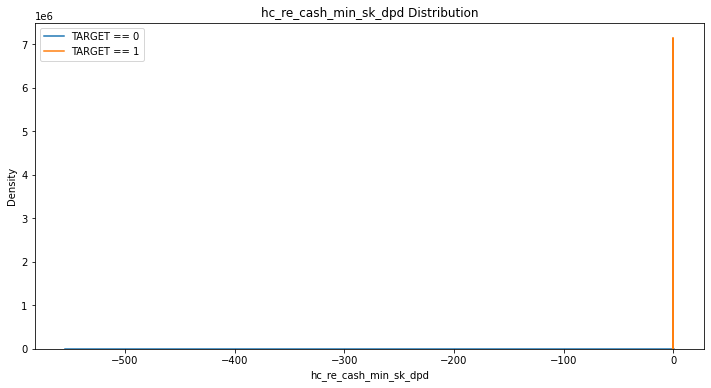

In [333]:
kde_target('hc_re_cash_min_sk_dpd', app_train)

In [334]:
app_train['hc_re_cash_min_sk_dpd'].isnull().sum()

0

### hc_re_cash_sum_sk_dpd

In [335]:
app_train[['TARGET', 'hc_re_cash_sum_sk_dpd']].corr()

,TARGET,hc_re_cash_sum_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_sum_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_sum_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


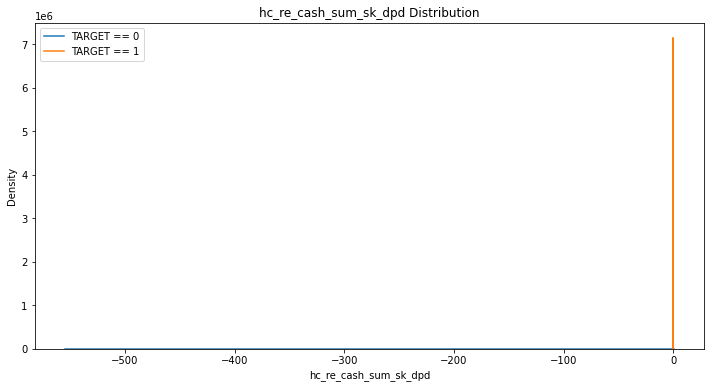

In [336]:
kde_target('hc_re_cash_sum_sk_dpd', app_train)

In [337]:
app_train['hc_re_cash_sum_sk_dpd'].isnull().sum()

0

### hc_re_cash_avg_sk_dpd

In [338]:
app_train[['TARGET', 'hc_re_cash_avg_sk_dpd']].corr()

,TARGET,hc_re_cash_avg_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_avg_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_avg_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


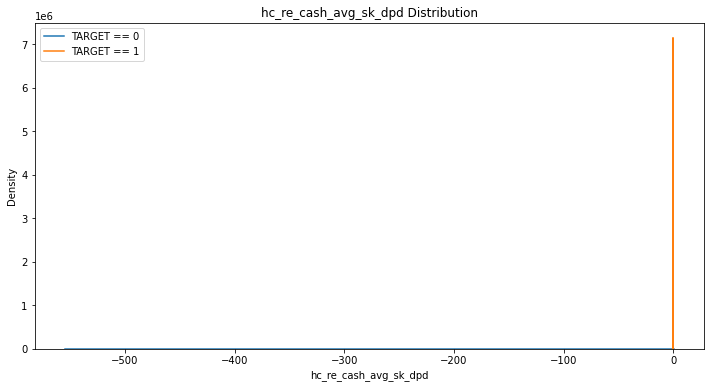

In [339]:
kde_target('hc_re_cash_avg_sk_dpd', app_train)

In [340]:
app_train['hc_re_cash_avg_sk_dpd'].isnull().sum()

0

### hc_re_cash_cnt_sk_dpd

In [341]:
app_train[['TARGET', 'hc_re_cash_cnt_sk_dpd']].corr()

,TARGET,hc_re_cash_cnt_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_cnt_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_cnt_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


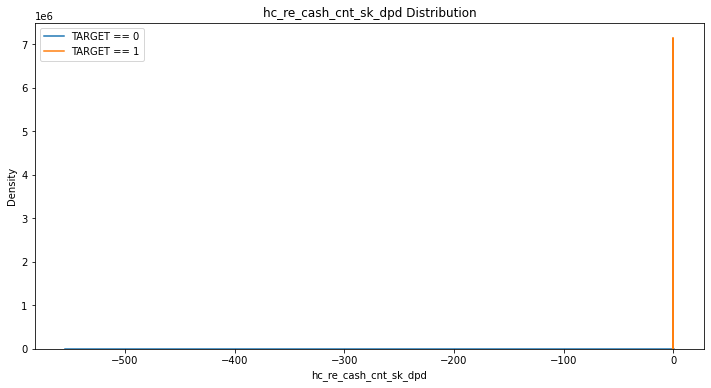

In [342]:
kde_target('hc_re_cash_cnt_sk_dpd', app_train)

In [343]:
app_train['hc_re_cash_cnt_sk_dpd'].isnull().sum()

0

### hc_re_cash_stddev_sk_dpd

In [344]:
app_train[['TARGET', 'hc_re_cash_stddev_sk_dpd']].corr()

,TARGET,hc_re_cash_stddev_sk_dpd
TARGET,1.000000,0.000534
hc_re_cash_stddev_sk_dpd,0.000534,1.000000


The correlation between hc_re_cash_stddev_sk_dpd and the TARGET is 0.0005
Median value for loan that was not repaid = 0.0018
Median value for loan that was repaid =     0.0018


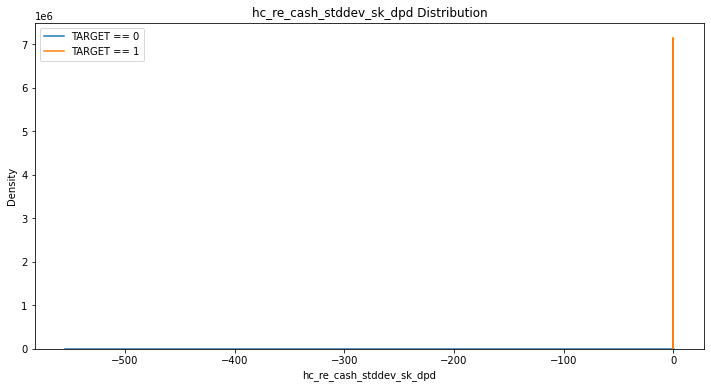

In [345]:
kde_target('hc_re_cash_stddev_sk_dpd', app_train)

In [346]:
app_train['hc_re_cash_stddev_sk_dpd'].isnull().sum()

0

### hc_re_cash_stddev_pop_sk_dpd

In [347]:
app_train[['TARGET', 'hc_re_cash_stddev_pop_sk_dpd']].corr()

,TARGET,hc_re_cash_stddev_pop_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_stddev_pop_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_stddev_pop_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


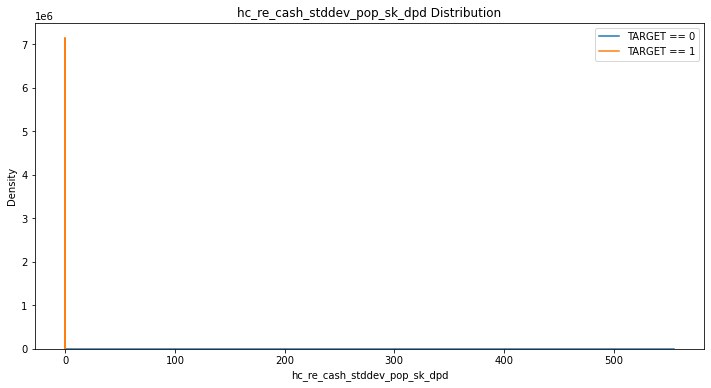

In [348]:
kde_target('hc_re_cash_stddev_pop_sk_dpd', app_train)

In [349]:
app_train['hc_re_cash_stddev_pop_sk_dpd'].isnull().sum()

0

### hc_re_cash_var_pop_sk_dpd

In [350]:
app_train[['TARGET', 'hc_re_cash_var_pop_sk_dpd']].corr()

,TARGET,hc_re_cash_var_pop_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_var_pop_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_var_pop_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


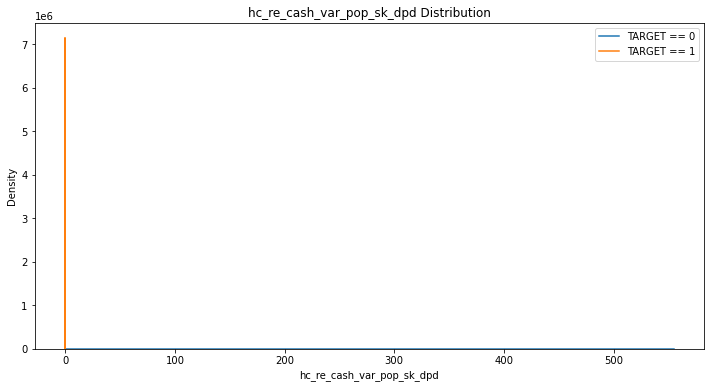

In [351]:
kde_target('hc_re_cash_var_pop_sk_dpd', app_train)

In [352]:
app_train['hc_re_cash_var_pop_sk_dpd'].isnull().sum()

0

### hc_re_cash_var_samp_sk_dpd

In [353]:
app_train[['TARGET', 'hc_re_cash_var_samp_sk_dpd']].corr()

,TARGET,hc_re_cash_var_samp_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_var_samp_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_var_samp_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


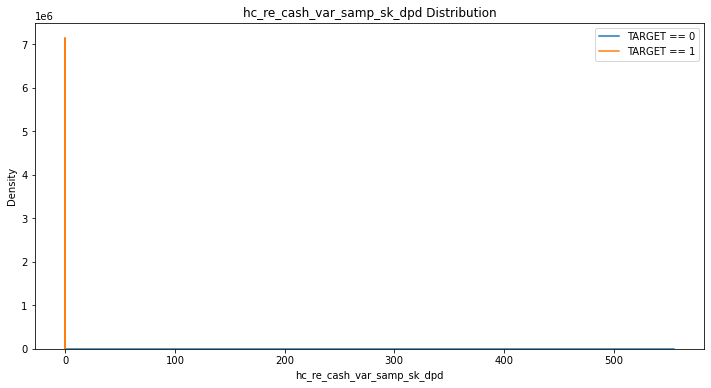

In [354]:
kde_target('hc_re_cash_var_samp_sk_dpd', app_train)

In [355]:
app_train['hc_re_cash_var_samp_sk_dpd'].isnull().sum()

0

### hc_re_cash_variance_samp_sk_dpd

In [356]:
app_train[['TARGET', 'hc_re_cash_variance_samp_sk_dpd']].corr()

,TARGET,hc_re_cash_variance_samp_sk_dpd
TARGET,1.000000,-0.000534
hc_re_cash_variance_samp_sk_dpd,-0.000534,1.000000


The correlation between hc_re_cash_variance_samp_sk_dpd and the TARGET is -0.0005
Median value for loan that was not repaid = -0.0018
Median value for loan that was repaid =     -0.0018


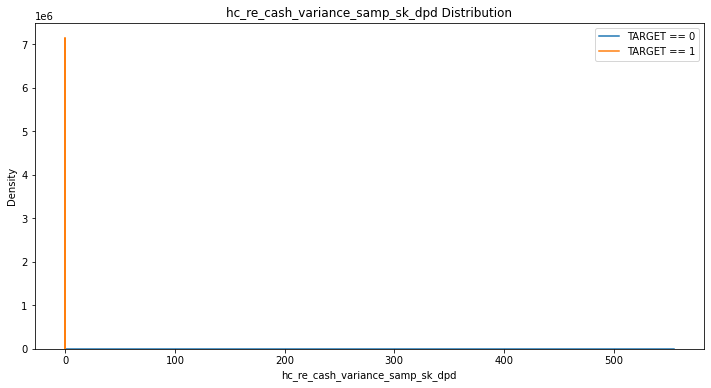

In [357]:
kde_target('hc_re_cash_variance_samp_sk_dpd', app_train)

In [358]:
app_train['hc_re_cash_variance_samp_sk_dpd'].isnull().sum()

0

## CSVをEXPORT

In [359]:
app_train['SK_ID_CURR'] = app_train[["SK_ID_CURR"]].astype(int) 
app_test['SK_ID_CURR'] = app_test[["SK_ID_CURR"]].astype(int)
app_test.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,FLAG_OWN_CAR_N,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1,1,1,0,-0.547236,1,1,1,-0.625259,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,1,1,1,1,-0.547236,0,1,1,-0.625259,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,1,1,0,0,-0.547236,0,1,1,-0.625259,0,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,1,1,1,1,-0.547236,1,0,1,1.599337,1,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,1,1,1,1,1.827367,0,1,0,-0.625259,0,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [360]:
app_train.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1.0,1,1,1,1,-0.547236,0,0,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,0.0,1,1,0,0,-0.547236,1,0,0,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,0.0,0,1,1,1,-0.547236,0,1,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,0.0,1,1,1,1,-0.547236,1,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,0.0,1,1,1,1,1.827367,0,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [361]:
remove_columns = list(app_test_origin.columns)
remove_columns.remove('SK_ID_CURR')
remove_columns

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_F',
 'FONDKAPREMONT_MODE_nan',
 'FLAG_OWN_REALTY_Y',
 'FLAG_PHONE',
 'FLAG_OWN_CAR_N',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Married',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'REG_CITY_NOT_LIVE_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EMERGENCYSTATE_MODE_No',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'NAME_INCOME_TYPE_Working',
 'HOUSETYPE_MODE_block of flats',
 'HOUSETYPE_MODE_nan',
 'WALLSMATERIAL_MODE_nan',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'EXT_SOURCE_3',
 'EMERGENCYSTATE_MODE_nan',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'FLAG_EMAIL',
 'LIVE_REGION_NOT_WORK_REGION',
 'EXT

In [362]:
app_train.drop(remove_columns, axis=1, inplace=True)
app_test.drop(remove_columns, axis=1, inplace=True)
app_br_train = app_train.copy()
app_br_test = app_test.copy()
app_br_test.head()

,SK_ID_CURR,hc_re_cash_max_amt_annuity,hc_re_cash_min_amt_annuity,hc_re_cash_sum_amt_annuity,hc_re_cash_avg_amt_annuity,hc_re_cash_cnt_amt_annuity,hc_re_cash_stddev_amt_annuity,hc_re_cash_stddev_pop_amt_annuity,hc_re_cash_var_pop_amt_annuity,hc_re_cash_var_samp_amt_annuity,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,100001,0.408496,0.236808,1.101622,0.297041,1.979030,0.734181,0.009456,0.019053,0.019055,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,100005,0.072642,-0.139846,0.710010,-0.051668,1.825263,0.540350,0.009399,0.019052,0.019053,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,100013,0.785583,0.653115,1.541777,0.686859,2.151977,0.952772,0.009481,0.019054,0.019056,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,100028,1.087399,0.981830,1.894413,0.997692,2.290528,1.128394,0.009520,0.019055,0.019057,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,100038,0.840840,0.713582,1.606316,0.743843,2.177337,0.984881,0.009476,0.019054,0.019056,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [363]:
### train
#app_train.to_csv(
#    path_or_buf="./home-credit-default-risk/exports/hc_only-rev-cash_train_axis-24.csv", # 出力先
#    sep=",",                                            # 区切り文字
#    index=False,                                        # indexの出力有無
#    header=True                                        # headerの出力有無
#)

In [364]:
### test
#app_test.to_csv(
#    path_or_buf="./home-credit-default-risk/exports/hc_only-rev-cash_test_axis-24.csv", # 出力先
#    sep=",",                                            # 区切り文字
#    index=False,                                        # indexの出力有無
#    header=True                                        # headerの出力有無
#)

In [365]:
columns = list(app_train.columns)
columns.remove('SK_ID_CURR')
columns.remove('TARGET')

In [366]:
data = pd.concat([app_train, app_test], sort=False)
train = data[:len(app_train)]
test = data[len(app_test):]


y_train = train['TARGET']
X_train = app_train.copy().drop('TARGET', axis=1)
X_test = app_test.copy()

In [367]:
import xgboost as xgb
from sklearn.metrics import log_loss

y_preds = []
models = []
scores = []
oof_train = np.zeros((len(X_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = columns

params = {
    'booster': 'gbtree'
    ,'objective': 'binary:logistic'
    ,'silent': 1
    ,'random_state': 17
    ,'gpu_id': 0
    ,'tree_method': 'gpu_hist'
    ,'eval_metric': 'auc'
    ,'eta': 0.1
    #,'max_round': 100
    ,'max_depth': 8
    ,'subsample': 0.8
    ,'colsample_state': 71
    ,'colsample_bytree': 1.0
    ,'colsample_bylevel': 0.3
    ,'subsumple': 0.9
    ,'gamma': 0
    ,'lambda': 1
    ,'alpha': 0
    ,'min_child_weight': 1
}

num_round = 50

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]
    
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)
    
    va_pred = model.predict(dvalid)
    score = log_loss(y_val, va_pred)
    oof_train[valid_index] = va_pred
    
    y_pred = model.predict(dtest) 
    
    
    #oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
    #y_pred = model.predict(X_test, num_iteration=model.best_iteration)##

    y_preds.append(y_pred)
    models.append(model)
    scores.append(score)

[19:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_state", "silent", "subsumple" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.59035	eval-auc:0.58409
[1]	train-auc:0.59581	eval-auc:0.59033
[2]	train-auc:0.59937	eval-auc:0.59225
[3]	train-auc:0.60198	eval-auc:0.59177
[4]	train-auc:0.60341	eval-auc:0.59063
[5]	train-auc:0.60637	eval-auc:0.59073
[6]	train-auc:0.60843	eval-auc:0.59162
[7]	train-auc:0.61006	eval-auc:0.59227
[8]	train-auc:0.61294	eval-auc:0.59283
[9]	train-auc:0.61433	eval-auc:0.59234
[10]	train-auc:0.61764	eval-auc:0.59270
[11]	train-auc:0.62039	eval-auc:0.59366
[12]	train-auc:0.62190	eval-auc:0.59354
[13]	train-auc:0.62327	eval-auc:0.59375
[14

In [368]:
remove_columns = ['TARGET']
app_br_train.drop(remove_columns, axis=1, inplace=True)
app_br_train.head()

,SK_ID_CURR,hc_re_cash_max_amt_annuity,hc_re_cash_min_amt_annuity,hc_re_cash_sum_amt_annuity,hc_re_cash_avg_amt_annuity,hc_re_cash_cnt_amt_annuity,hc_re_cash_stddev_amt_annuity,hc_re_cash_stddev_pop_amt_annuity,hc_re_cash_var_pop_amt_annuity,hc_re_cash_var_samp_amt_annuity,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,100002,-0.550225,-0.525635,-0.497174,-0.544356,-0.063732,-0.474759,0.009246,0.019042,0.019044,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,100003,1.040302,1.019123,0.945304,1.035837,0.181215,0.936643,0.009477,0.019069,0.019071,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,100004,-1.920536,-1.935616,-1.729480,-1.928740,-0.676947,-1.789408,0.008311,-0.087239,-0.087163,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,100006,0.211104,0.223992,0.192042,0.215073,0.274399,0.202340,0.009361,0.019056,0.019057,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,100007,0.006586,0.024645,0.006641,0.011678,0.220324,0.020832,0.009336,0.019052,0.019054,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [369]:
# trainへマージ
app_train = pd.merge(app_train_origin.copy(), app_br_train, on='SK_ID_CURR', how='left')
# testへマージ
app_test = pd.merge(app_test_origin.copy(), app_br_test, on='SK_ID_CURR', how='left')
app_train.head()

,TARGET,NAME_CONTRACT_TYPE_Cash loans,NAME_HOUSING_TYPE_House / apartment,NAME_TYPE_SUITE_Unaccompanied,NAME_EDUCATION_TYPE_Secondary / secondary special,REG_CITY_NOT_WORK_CITY,CODE_GENDER_F,FONDKAPREMONT_MODE_nan,FLAG_OWN_REALTY_Y,FLAG_PHONE,...,hc_re_cash_max_sk_dpd,hc_re_cash_min_sk_dpd,hc_re_cash_sum_sk_dpd,hc_re_cash_avg_sk_dpd,hc_re_cash_cnt_sk_dpd,hc_re_cash_stddev_sk_dpd,hc_re_cash_stddev_pop_sk_dpd,hc_re_cash_var_pop_sk_dpd,hc_re_cash_var_samp_sk_dpd,hc_re_cash_variance_samp_sk_dpd
0,1.0,1,1,1,1,-0.547236,0,0,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
1,0.0,1,1,0,0,-0.547236,1,0,0,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
2,0.0,0,1,1,1,-0.547236,0,1,1,1.599337,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
3,0.0,1,1,1,1,-0.547236,1,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803
4,0.0,1,1,1,1,1.827367,0,1,1,-0.625259,...,0.001803,0.001803,0.001803,0.001803,0.001803,0.001803,-0.001803,-0.001803,-0.001803,-0.001803


In [370]:
columns = list(app_train.columns)
columns

['TARGET',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'REG_CITY_NOT_WORK_CITY',
 'CODE_GENDER_F',
 'FONDKAPREMONT_MODE_nan',
 'FLAG_OWN_REALTY_Y',
 'FLAG_PHONE',
 'FLAG_OWN_CAR_N',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS_Married',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'REG_CITY_NOT_LIVE_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EMERGENCYSTATE_MODE_No',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'NAME_INCOME_TYPE_Working',
 'HOUSETYPE_MODE_block of flats',
 'HOUSETYPE_MODE_nan',
 'WALLSMATERIAL_MODE_nan',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'EXT_SOURCE_3',
 'EMERGENCYSTATE_MODE_nan',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'FLAG_EMAIL',
 'LIVE_REGION_NOT_WORK_REG

In [371]:
columns = list(app_train.columns)
columns.remove('SK_ID_CURR')
columns.remove('TARGET')

In [372]:
data = pd.concat([app_train, app_test], sort=False)
train = data[:len(app_train)]
test = data[len(app_test):]

y_train = train['TARGET']
X_train = app_train.copy().drop('TARGET', axis=1)
X_test = app_test.copy()

In [373]:
import xgboost as xgb
from sklearn.metrics import log_loss

y_preds = []
models = []
scores = []
oof_train = np.zeros((len(X_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = columns

params = {
    'booster': 'gbtree'
    ,'objective': 'binary:logistic'
    ,'silent': 1
    ,'random_state': 17
    ,'gpu_id': 0
    ,'tree_method': 'gpu_hist'
    ,'eval_metric': 'auc'
    ,'eta': 0.1
    #,'max_round': 100
    ,'max_depth': 8
    ,'subsample': 0.8
    ,'colsample_state': 71
    ,'colsample_bytree': 1.0
    ,'colsample_bylevel': 0.3
    ,'subsumple': 0.9
    ,'gamma': 0
    ,'lambda': 1
    ,'alpha': 0
    ,'min_child_weight': 1
}

num_round = 50

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]
    
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)
    
    va_pred = model.predict(dvalid)
    score = log_loss(y_val, va_pred)
    oof_train[valid_index] = va_pred
    
    y_pred = model.predict(dtest) 
    
    y_preds.append(y_pred)
    models.append(model)
    scores.append(score)

[19:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_state", "silent", "subsumple" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.72763	eval-auc:0.70508
[1]	train-auc:0.74542	eval-auc:0.72097
[2]	train-auc:0.75087	eval-auc:0.72698
[3]	train-auc:0.75560	eval-auc:0.72885
[4]	train-auc:0.75827	eval-auc:0.73103
[5]	train-auc:0.76067	eval-auc:0.73217
[6]	train-auc:0.76286	eval-auc:0.73342
[7]	train-auc:0.76625	eval-auc:0.73494
[8]	train-auc:0.76806	eval-auc:0.73514
[9]	train-auc:0.76978	eval-auc:0.73664
[10]	train-auc:0.77188	eval-auc:0.73726
[11]	train-auc:0.77286	eval-auc:0.73805
[12]	train-auc:0.77492	eval-auc:0.73866
[13]	train-auc:0.77631	eval-auc:0.73876
[14

[12]	train-auc:0.77693	eval-auc:0.73658
[13]	train-auc:0.77860	eval-auc:0.73653
[14]	train-auc:0.77987	eval-auc:0.73703
[15]	train-auc:0.78082	eval-auc:0.73776
[16]	train-auc:0.78221	eval-auc:0.73799
[17]	train-auc:0.78407	eval-auc:0.73861
[18]	train-auc:0.78512	eval-auc:0.73856
[19]	train-auc:0.78637	eval-auc:0.73878
[20]	train-auc:0.78744	eval-auc:0.73908
[21]	train-auc:0.78915	eval-auc:0.73981
[22]	train-auc:0.79039	eval-auc:0.73999
[23]	train-auc:0.79236	eval-auc:0.74093
[24]	train-auc:0.79390	eval-auc:0.74128
[25]	train-auc:0.79516	eval-auc:0.74147
[26]	train-auc:0.79628	eval-auc:0.74187
[27]	train-auc:0.79759	eval-auc:0.74246
[28]	train-auc:0.79896	eval-auc:0.74307
[29]	train-auc:0.80076	eval-auc:0.74306
[30]	train-auc:0.80207	eval-auc:0.74315
[31]	train-auc:0.80336	eval-auc:0.74382
[32]	train-auc:0.80484	eval-auc:0.74432
[33]	train-auc:0.80622	eval-auc:0.74421
[34]	train-auc:0.80860	eval-auc:0.74485
[35]	train-auc:0.81002	eval-auc:0.74478
[36]	train-auc:0.81164	eval-auc:0.74495


In [374]:
# CSV-00
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[0]
submit_all.isnull().sum()

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_00.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [375]:
# CSV-01
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[1]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_01.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [376]:
# CSV-02
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[2]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_02.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [377]:
# CSV-03
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[3]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_03.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [378]:
# CSV-04
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[4]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_04.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [379]:
submit_all_00 = pd.read_csv('./home-credit-default-risk/submit/submit_all_00.csv')
submit_all_01 = pd.read_csv('./home-credit-default-risk/submit/submit_all_01.csv')
submit_all_02 = pd.read_csv('./home-credit-default-risk/submit/submit_all_02.csv')
submit_all_03 = pd.read_csv('./home-credit-default-risk/submit/submit_all_03.csv')
submit_all_04 = pd.read_csv('./home-credit-default-risk/submit/submit_all_04.csv')

In [380]:
submit_all = pd.DataFrame({
    'submit_all_00': submit_all_00['TARGET'].values
    ,'submit_all_01': submit_all_01['TARGET'].values
    ,'submit_all_02': submit_all_02['TARGET'].values
    ,'submit_all_03': submit_all_03['TARGET'].values
    ,'submit_all_04': submit_all_04['TARGET'].values
    })
submit_all.head()

,submit_all_00,submit_all_01,submit_all_02,submit_all_03,submit_all_04
0,0.042906,0.079019,0.051608,0.043630,0.052515
1,0.118561,0.130610,0.190374,0.148023,0.157157
2,0.028359,0.025125,0.032985,0.039606,0.024137
3,0.048880,0.045868,0.053403,0.047161,0.033078
4,0.155106,0.165527,0.145572,0.148714,0.120282


In [381]:
submit_all = app_test[["SK_ID_CURR"]].astype(int).copy()
submit_all['TARGET'] = (submit_all_00['TARGET'] + submit_all_01['TARGET'] + submit_all_02['TARGET'] + submit_all_03['TARGET'] + submit_all_04['TARGET'])/5
submit_all.head()

,SK_ID_CURR,TARGET
0,100001,0.053936
1,100005,0.148945
2,100013,0.030043
3,100028,0.045678
4,100038,0.147040


In [382]:
#submit_all['TARGET'] = (submit_all['TARGET'] / 5)
#submit_all.to_csv('./home-credit-default-risk/submit/submit_hc_only-rev-cash_test_axis-24.csv', index=False)
#submit_all.head()

In [383]:
submit_all.count()

SK_ID_CURR    48744
TARGET        48744
dtype: int64